In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor

In [2]:
## here writing used functions

## ---function will return the values of the relative error

def DeltaPercent(prediction, validation):
    deltapercent = ((prediction - validation) / validation) * 100
    return deltapercent

## def Adaptation ( prediction, )

In [3]:
start_data = pd.read_csv("DataanyvalCSVD1_XAUUSD.csv", sep = ';')

In [4]:
start_data.iloc[2499: 2499+90   ]

Number        DAte  Pr(XAU/USD)  Vol(XAU/USD)
2499    2500  1504742400     1341.130      212420.0
2500    2501  1504828800     1350.090      228863.0
2501    2502  1505088000     1333.155      185643.0
2502    2503  1505174400     1327.300      185545.0
2503    2504  1505260800     1327.695      181384.0
...      ...         ...          ...           ...
2584    2585  1515369600     1318.390      114975.0
2585    2586  1515456000     1314.555      144162.0
2586    2587  1515542400     1317.890      186915.0
2587    2588  1515628800     1319.770      164428.0
2588    2589  1515715200     1330.395      174435.0

[90 rows x 4 columns]

In [5]:
start_data.shape

(3260, 4)

In [6]:
## diferent variables
count_el_in_arr = 2300     ## count of elements in the  data array
count_el_to_training = 2100
count_el_to_final_validation = 100
first_el_to_final_validation = 2500
last_el_to_final_validation = 2600
## size of each element
size_el_to_arr_1 = 34        ## size of each element
size_el_to_arr_2 = 55
size_el_to_arr_3 = 89
size_el_to_arr_4 = 144

## count of elements in the training ansvers array
size_ans_arr_1 = 5
size_ans_arr_2 = 8
size_ans_arr_3 = 13
size_ans_arr_4 = 21
  


In [7]:
## creation  srrays for dataset`s

##-----13 bars in ansvers-------------------------
## ---set1-----------------------------------------
set_1 = np.zeros((count_el_in_arr, size_el_to_arr_1))
set_1_ansvers = np.zeros((count_el_in_arr, size_ans_arr_3))

for i in range(count_el_in_arr):
    slice_data = start_data.loc[i : (i + (size_el_to_arr_1 - 1)), "Pr(XAU/USD)"]
    set_1[i] = np.asarray(slice_data)
for i in range (count_el_in_arr):
    slice_data = start_data.loc[i + size_el_to_arr_1 - 1 : (i + size_el_to_arr_1 + (size_ans_arr_3-2)), "Pr(XAU/USD)"]
    set_1_ansvers[i] = np.asarray(slice_data)
    

## ---set2-----------------------------------------
set_2 = np.zeros((count_el_in_arr, size_el_to_arr_2))
set_2_ansvers = np.zeros((count_el_in_arr, size_ans_arr_3))

for i in range(count_el_in_arr):
    slice_data = start_data.loc[i : (i + (size_el_to_arr_2 - 1)), "Pr(XAU/USD)"]
    set_2[i] = np.asarray(slice_data)
for i in range (count_el_in_arr):
    slice_data = start_data.loc[i + size_el_to_arr_2 - 1 : (i + size_el_to_arr_2 + (size_ans_arr_3-2)), "Pr(XAU/USD)"]
    set_2_ansvers[i] = np.asarray(slice_data)


## ---set3-----------------------------------------
set_3 = np.zeros((count_el_in_arr, size_el_to_arr_3))
set_3_ansvers = np.zeros((count_el_in_arr, size_ans_arr_3))

for i in range(count_el_in_arr):
    slice_data = start_data.loc[i : (i + (size_el_to_arr_3 - 1)), "Pr(XAU/USD)"]
    set_3[i] = np.asarray(slice_data)
for i in range (count_el_in_arr):
    slice_data = start_data.loc[i + size_el_to_arr_3 -1 : (i + size_el_to_arr_3 + (size_ans_arr_3-2)), "Pr(XAU/USD)"]
    set_3_ansvers[i] = np.asarray(slice_data)

## ---smal_set-----------------------------------------

## ---smal_set-----------------------------------------
size_1 = 1100
el_1 = 1000
set_4 = np.zeros((size_1, size_el_to_arr_2))
set_4_ans = np.zeros((size_1, size_ans_arr_3 ))

for i in range (size_1):
    slice_data = start_data.loc[el_1 + i - size_el_to_arr_2 + 1 : el_1 + i, "Pr(XAU/USD)"]
    set_4[i] = np.asarray(slice_data)
    slice_data = start_data.loc[el_1 + i : el_1 + i + size_ans_arr_3 - 1, "Pr(XAU/USD)"]
    set_4_ans[i] = np.asarray(slice_data)

In [8]:
## ----------------------------------------------------------------------
## ---sets for final validation -----------------------------------------
## ----------------------------------------------------------------------
## ---set1---------------------------------------------------------------
set_for_final_validation_1 = np.zeros((count_el_to_final_validation, size_el_to_arr_1))
ansver_for_final_validation_1 = np.zeros((count_el_to_final_validation, size_ans_arr_3))
for i in range(count_el_to_final_validation):
    slice_data = start_data.loc[i + first_el_to_final_validation - size_el_to_arr_1 + 1 : i + first_el_to_final_validation, "Pr(XAU/USD)"]
    set_for_final_validation_1[i] = np.asarray(slice_data)
for i in range (count_el_to_final_validation):
    slice_data = start_data.loc[i  + first_el_to_final_validation  : i + first_el_to_final_validation + (size_ans_arr_3) - 1, "Pr(XAU/USD)"]
    ansver_for_final_validation_1[i] = np.asarray(slice_data)
## ---set2---------------------------------------------------------------    
set_for_final_validation_2 = np.zeros((count_el_to_final_validation, size_el_to_arr_2))
ansver_for_final_validation_2 = np.zeros((count_el_to_final_validation, size_ans_arr_3))
for i in range(count_el_to_final_validation):
    slice_data = start_data.loc[i + first_el_to_final_validation - size_el_to_arr_2 + 1 : i + first_el_to_final_validation, "Pr(XAU/USD)"]
    set_for_final_validation_2[i] = np.asarray(slice_data)
for i in range (count_el_to_final_validation):
    slice_data = start_data.loc[i + first_el_to_final_validation : i + first_el_to_final_validation + (size_ans_arr_3) - 1, "Pr(XAU/USD)"]
    ansver_for_final_validation_2[i] = np.asarray(slice_data)
## ---set3---------------------------------------------------------------     
set_for_final_validation_3 = np.zeros((count_el_to_final_validation, size_el_to_arr_3))
ansver_for_final_validation_3 = np.zeros((count_el_to_final_validation, size_ans_arr_3))
for i in range(count_el_to_final_validation):
    slice_data = start_data.loc[i + first_el_to_final_validation - size_el_to_arr_3 + 1 : i + first_el_to_final_validation, "Pr(XAU/USD)"]
    set_for_final_validation_3[i] = np.asarray(slice_data)
for i in range (count_el_to_final_validation):
    slice_data = start_data.loc[i + first_el_to_final_validation : i + first_el_to_final_validation + (size_ans_arr_3) - 1, "Pr(XAU/USD)"]
    ansver_for_final_validation_3[i] = np.asarray(slice_data)
  

In [9]:
ansver_for_final_validation_3[i]

array([1344.94 , 1341.605, 1339.985, 1344.055, 1338.69 , 1335.24 ,
       1333.075, 1321.8  , 1314.555, 1316.87 , 1320.635, 1326.15 ,
       1336.525])

In [10]:
##start_data.loc[2499 : 2520]

In [11]:
set_for_final_validation_3[0]

array([1221.35 , 1221.54 , 1222.265, 1227.985, 1232.055, 1234.615,
       1248.825, 1255.445, 1251.29 , 1257.07 , 1257.115, 1253.33 ,
       1256.655, 1261.195, 1266.98 , 1264.85 , 1266.765, 1265.825,
       1269.155, 1280.54 , 1287.65 , 1288.715, 1280.03 , 1273.065,
       1266.9  , 1264.025, 1269.025, 1259.   , 1254.42 , 1249.3  ,
       1244.66 , 1244.29 , 1249.585, 1253.915, 1247.045, 1247.245,
       1250.165, 1246.44 , 1243.67 , 1230.57 , 1223.15 , 1223.075,
       1225.785, 1217.79 , 1210.09 , 1212.77 , 1219.58 , 1220.44 ,
       1223.785, 1232.07 , 1238.64 , 1239.93 , 1241.33 , 1249.485,
       1255.315, 1253.365, 1253.585, 1259.875, 1264.07 , 1268.375,
       1268.33 , 1267.805, 1263.755, 1262.12 , 1257.785, 1258.305,
       1269.305, 1281.165, 1286.63 , 1284.4  , 1274.565, 1275.75 ,
       1285.855, 1292.115, 1287.155, 1287.255, 1286.995, 1287.76 ,
       1285.075, 1301.9  , 1315.465, 1309.395, 1310.765, 1322.54 ,
       1335.745, 1335.23 , 1336.975, 1341.13 , 1350.09 ])

In [12]:
ansver_for_final_validation_3[0]

array([1350.09 , 1333.155, 1327.3  , 1327.695, 1323.11 , 1326.795,
       1312.22 , 1308.36 , 1305.975, 1294.86 , 1294.41 , 1300.705,
       1302.815])

In [13]:
## here creation sets for training models
##---set 1---------------- 
training_data_1 = set_1[ : count_el_to_training]
training_ansvers_1 = set_1_ansvers[ :count_el_to_training]
validation_data_1 = set_1[count_el_to_training : ]
validation_ansvers_1 = set_1_ansvers[count_el_to_training : ]
##---set 2----------------
training_data_2 = set_2[ : count_el_to_training]
training_ansvers_2 = set_2_ansvers [ :count_el_to_training]
validation_data_2 = set_2[count_el_to_training : ]
validation_ansvers_2 = set_2_ansvers [count_el_to_training : ]
##---set 3----------------
training_data_3 = set_3[ : count_el_to_training]
training_ansvers_3 = set_3_ansvers[ : count_el_to_training]
validation_data_3 = set_3[count_el_to_training : ]
validation_ansvers_3 = set_3_ansvers[count_el_to_training : ]

##---set 3----------------
training_data_4 = set_4 [ : 1000]
training_ansvers_4 = set_4_ans [ : 1000]
validation_data_4 = set_4[1050 : ]
validation_ansvers_4 = set_4_ans[ 1050 : ]

    

In [14]:

validation_data_1

array([[1213.99 , 1217.685, 1237.515, ..., 1224.45 , 1232.72 , 1236.045],
       [1217.685, 1237.515, 1232.045, ..., 1232.72 , 1236.045, 1249.095],
       [1237.515, 1232.045, 1225.865, ..., 1236.045, 1249.095, 1256.86 ],
       ...,
       [1185.535, 1182.03 , 1190.03 , ..., 1185.335, 1187.665, 1198.68 ],
       [1182.03 , 1190.03 , 1188.015, ..., 1187.665, 1198.68 , 1194.315],
       [1190.03 , 1188.015, 1182.73 , ..., 1198.68 , 1194.315, 1203.33 ]])

In [15]:
neighbors_count = 1

Dolores_KNN_1 = KNeighborsRegressor(n_neighbors = neighbors_count)
Dolores_KNN_1.fit(training_data_1, training_ansvers_1)
prediction_Dolores_KNN_1 = Dolores_KNN_1.predict(validation_data_1)

Dolores_KNN_2 = KNeighborsRegressor(n_neighbors = neighbors_count)
Dolores_KNN_2.fit(training_data_2, training_ansvers_2)
prediction_Dolores_KNN_2 = Dolores_KNN_2.predict(validation_data_2)

Dolores_KNN_3 = KNeighborsRegressor(n_neighbors = neighbors_count)
Dolores_KNN_3.fit(training_data_3, training_ansvers_3)
prediction_Dolores_KNN_3 = Dolores_KNN_3.predict(validation_data_3)

Dolores_KNN_4 = KNeighborsRegressor(n_neighbors = 3)
Dolores_KNN_4.fit(training_data_4, training_ansvers_4)
prediction_Dolores_KNN_4 = Dolores_KNN_4.predict(validation_data_4)


    

In [16]:
training_data_4 = set_4 [ : 1000]
training_ansvers_4 = set_4_ans [ : 1000]
validation_data_4 = set_4[1050 : ]
validation_ansvers_4 = set_4_ans[ 1050 : ]


In [17]:
prediction_Dolores_KNN_4.shape

(50, 13)

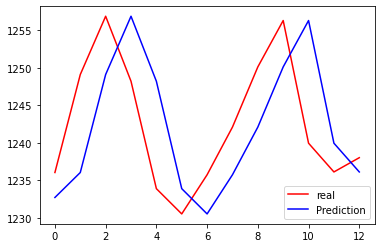

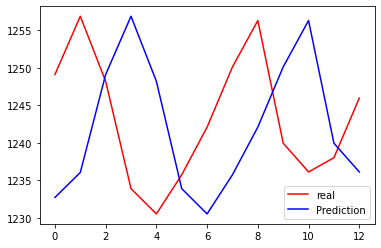

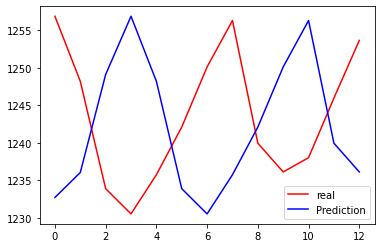

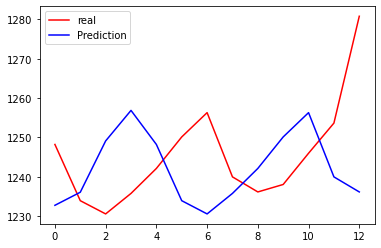

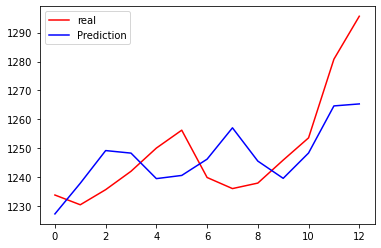

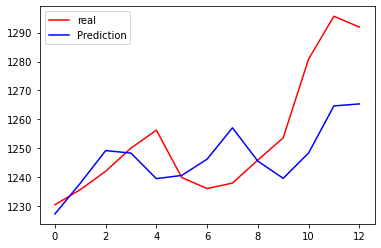

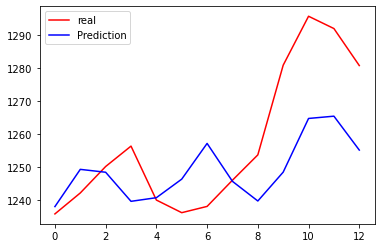

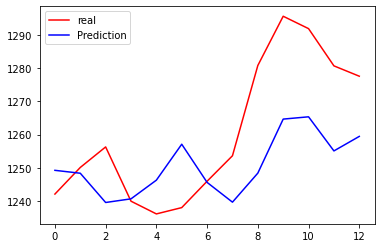

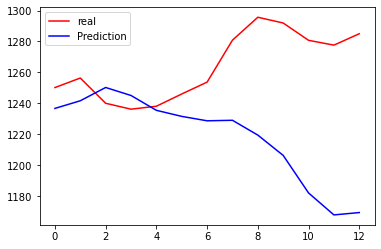

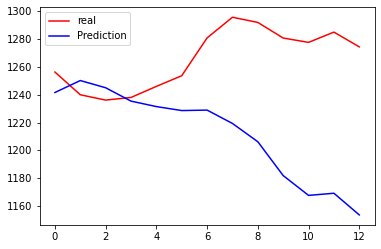

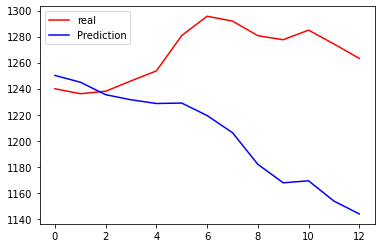

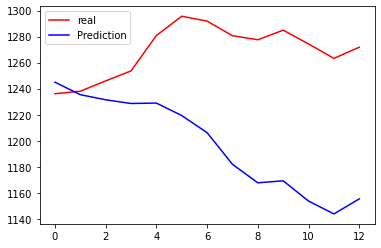

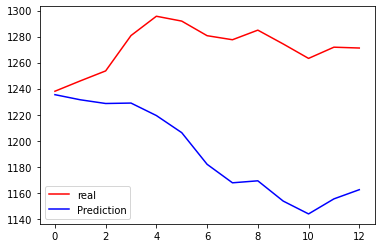

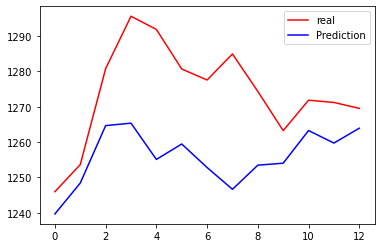

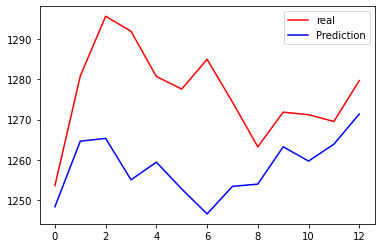

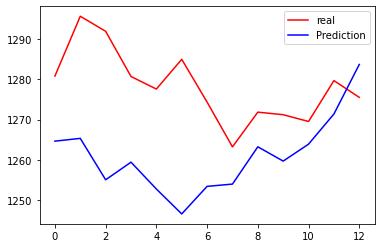

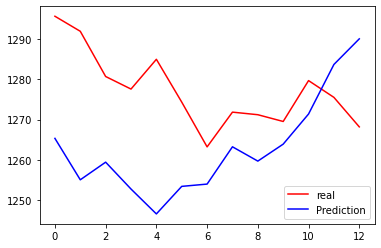

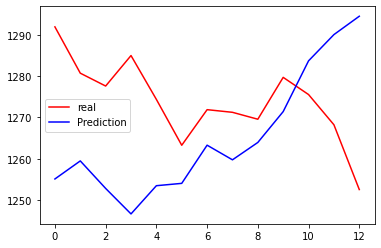

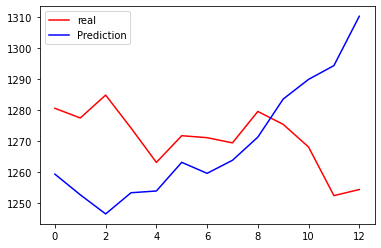

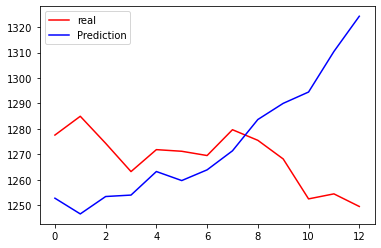

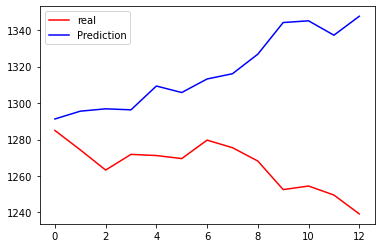

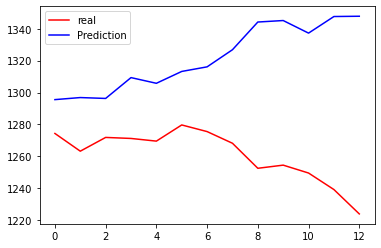

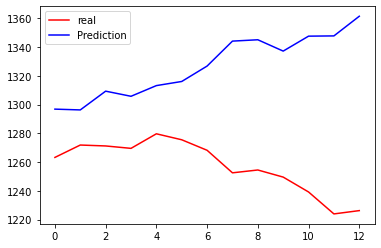

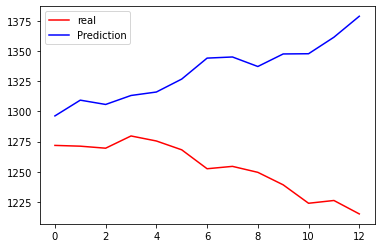

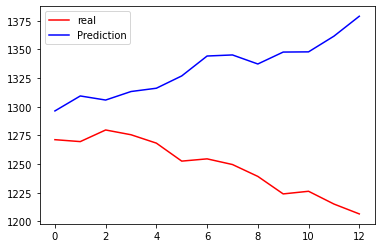

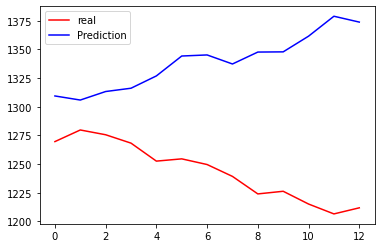

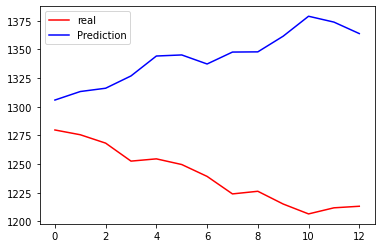

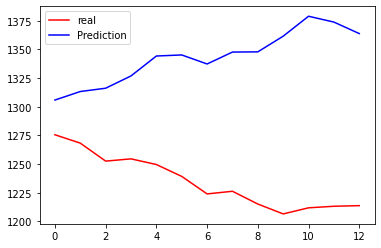

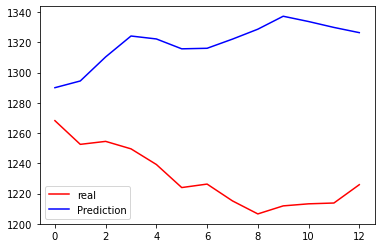

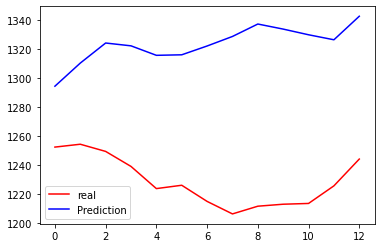

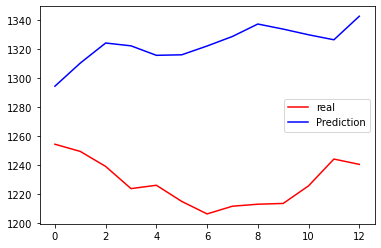

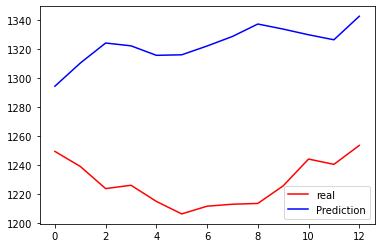

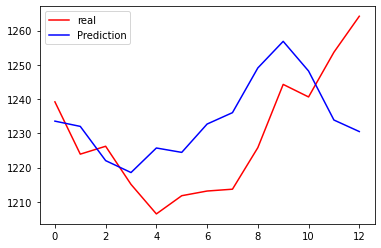

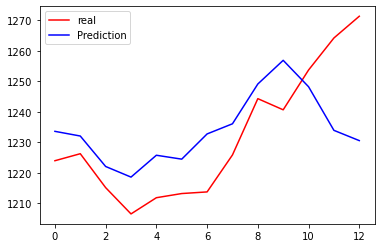

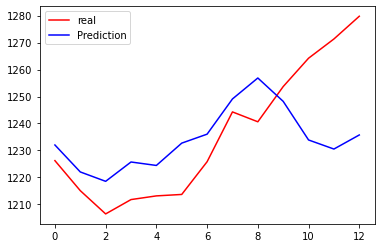

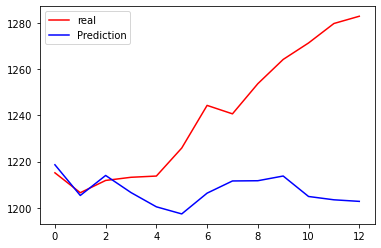

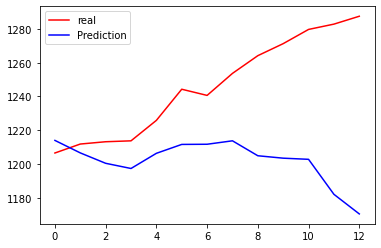

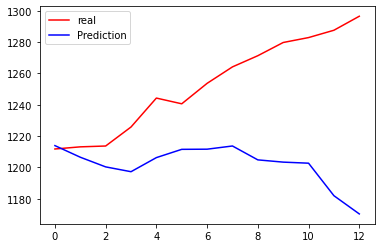

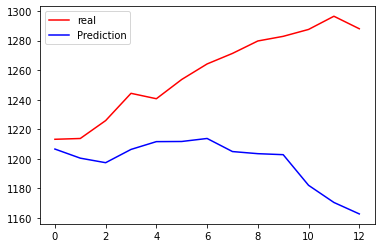

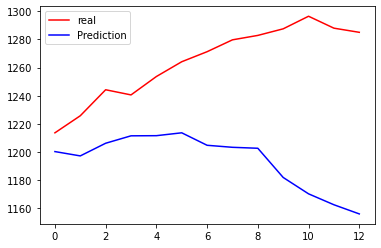

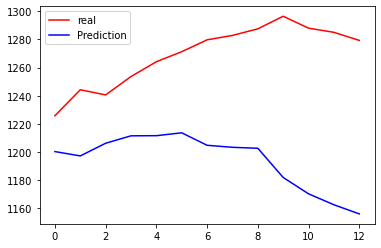

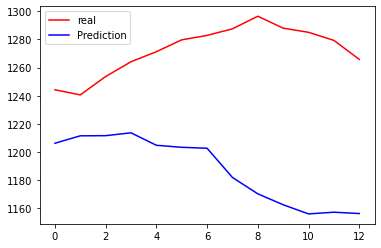

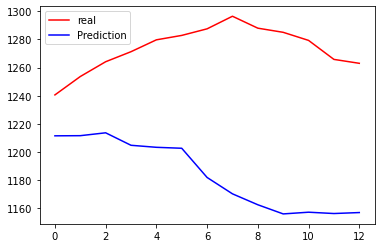

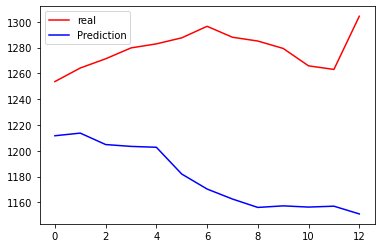

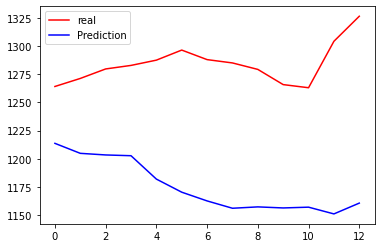

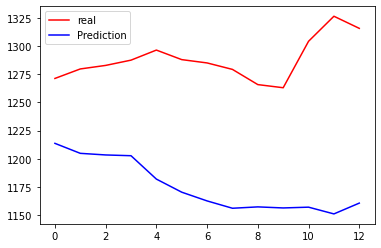

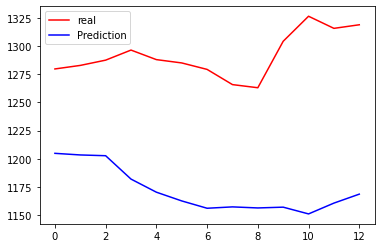

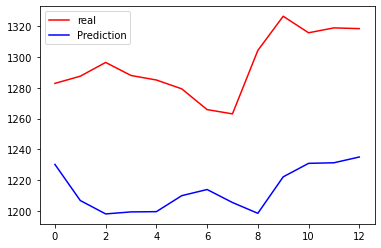

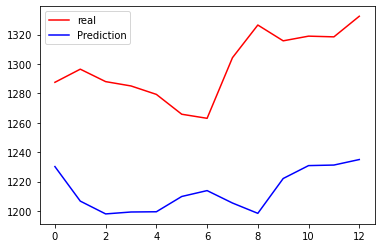

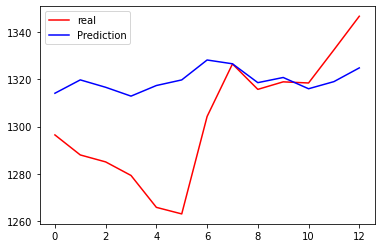

In [18]:
for i in range (50):   
    os_x = np.arange(size_ans_arr_3)
    num = i
    plt.plot(os_x, validation_ansvers_1[num],'r', label = 'real')
    plt.plot(os_x, prediction_Dolores_KNN_1[num],'b', label = 'Prediction')

    plt.legend()
    plt.show()

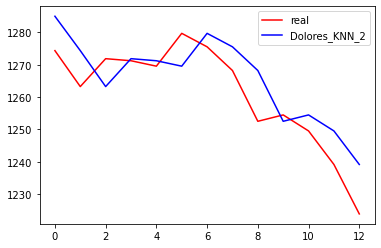

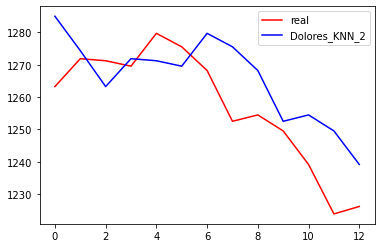

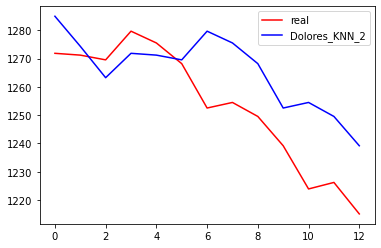

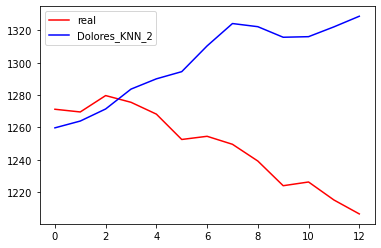

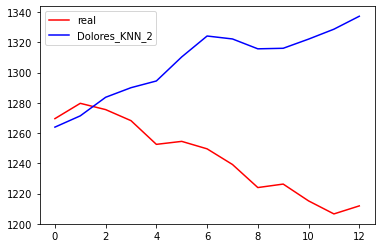

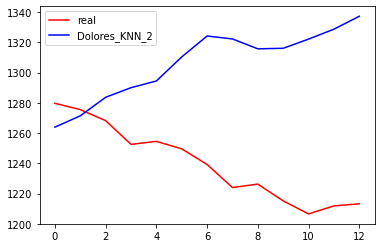

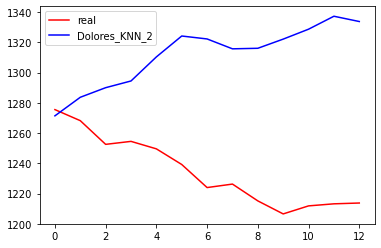

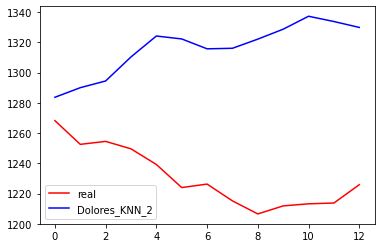

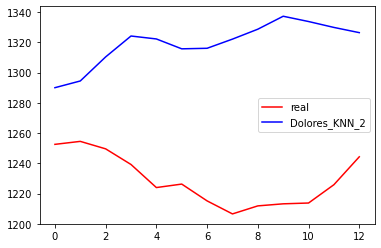

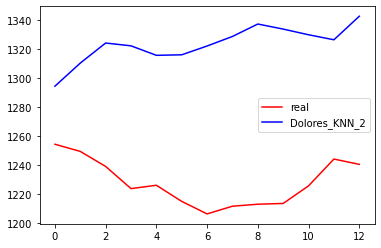

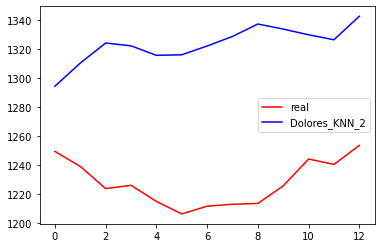

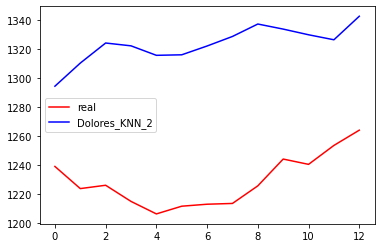

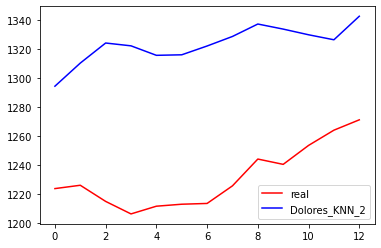

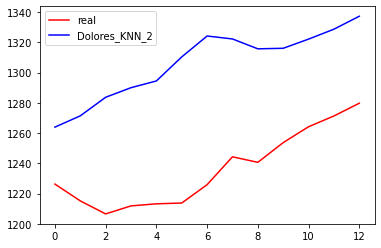

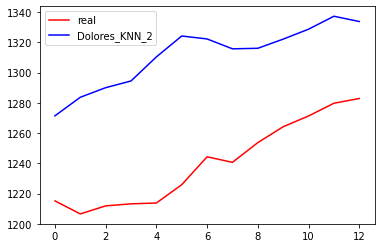

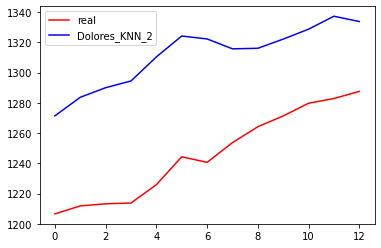

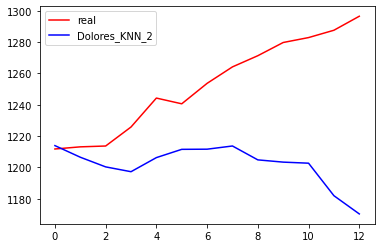

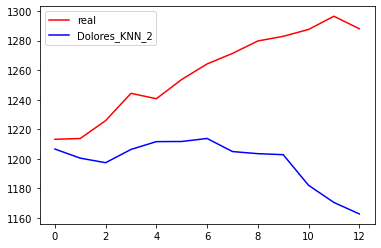

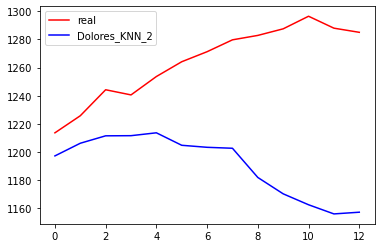

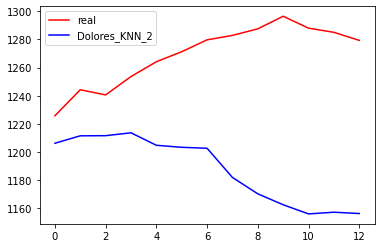

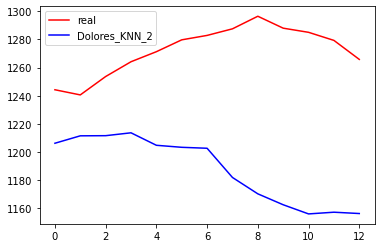

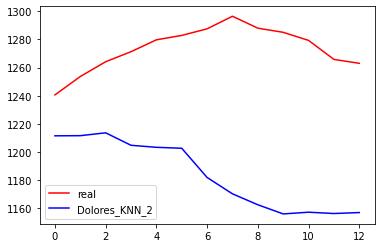

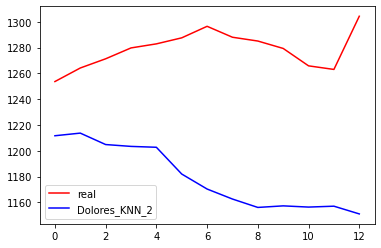

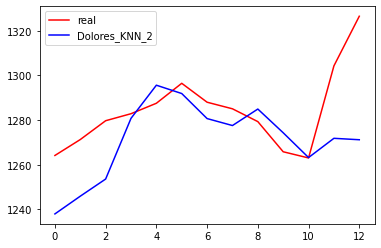

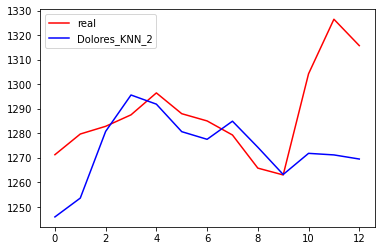

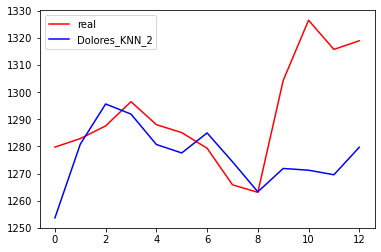

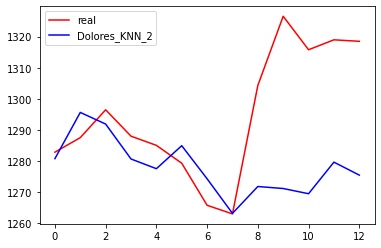

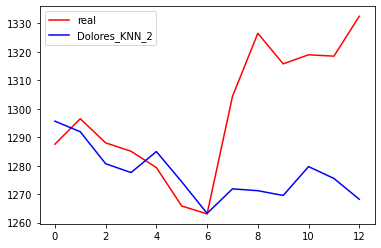

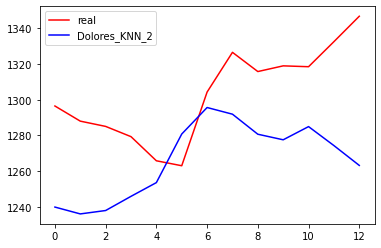

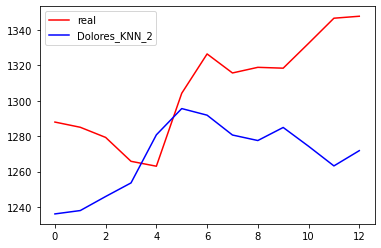

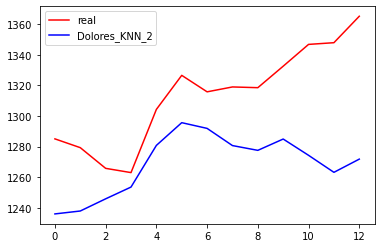

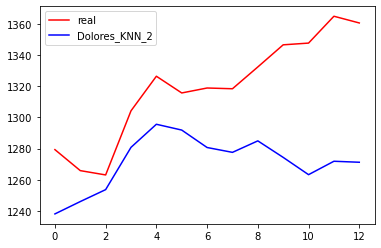

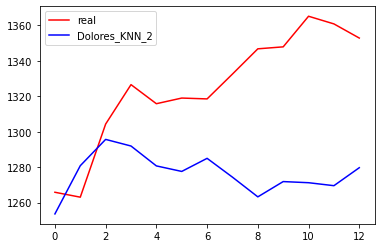

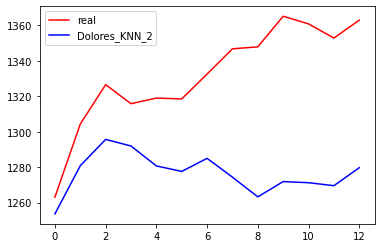

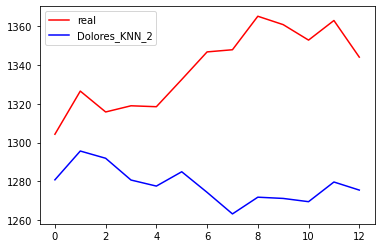

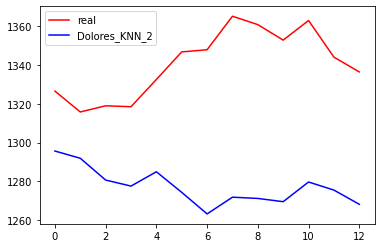

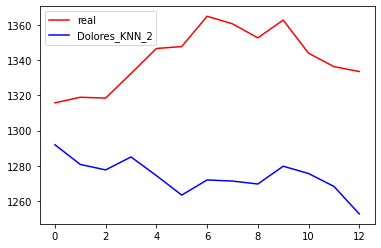

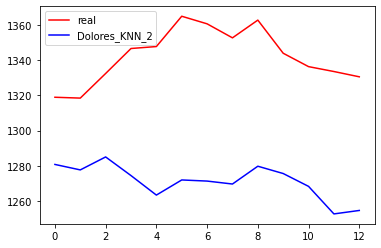

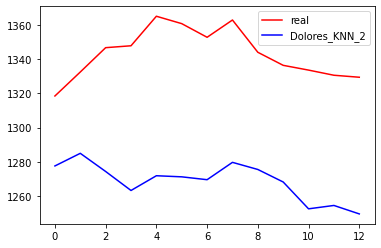

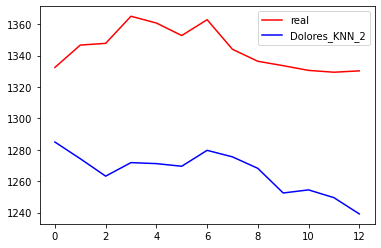

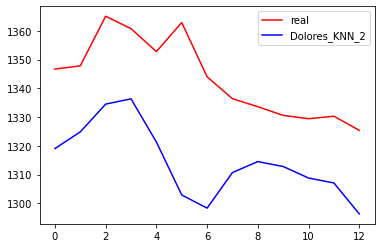

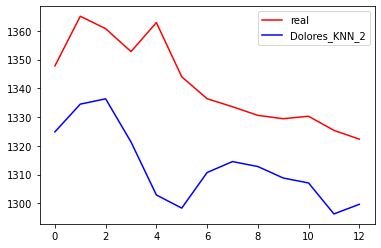

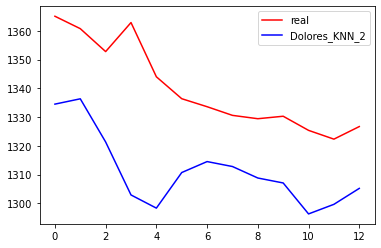

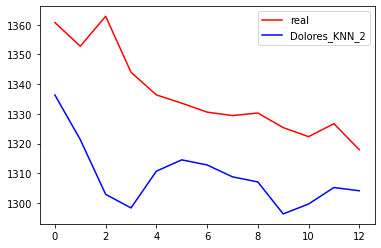

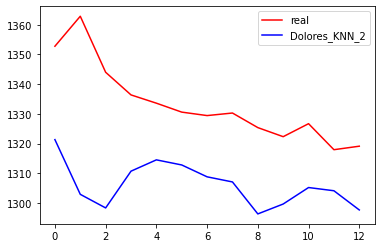

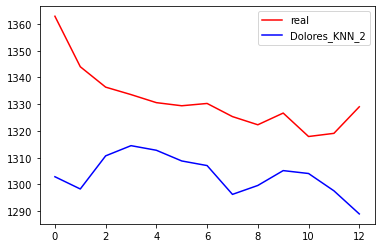

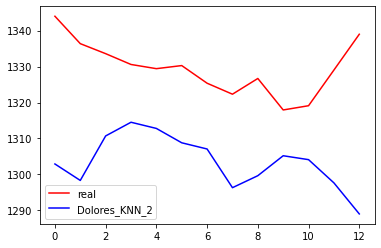

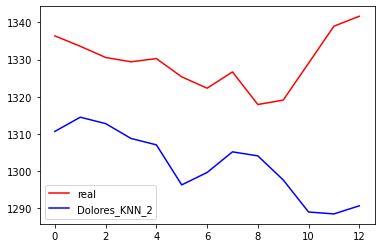

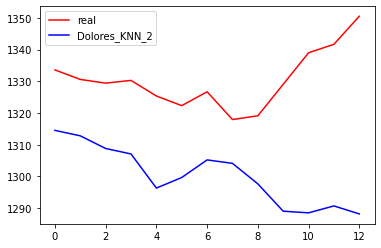

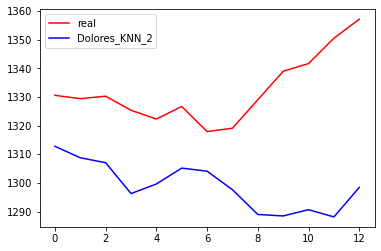

In [19]:
for i in range (50):   
    os_x = np.arange(size_ans_arr_3)
    num = i
    plt.plot(os_x, validation_ansvers_2[num],'r', label = 'real')
    plt.plot(os_x, prediction_Dolores_KNN_2[num],'b', label = 'Dolores_KNN_2')

    plt.legend()
    plt.show()

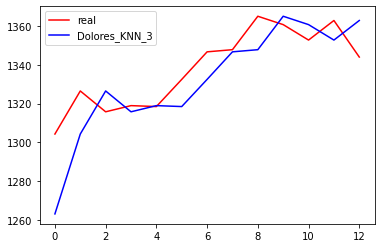

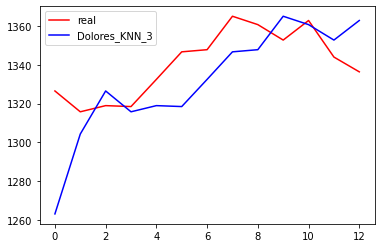

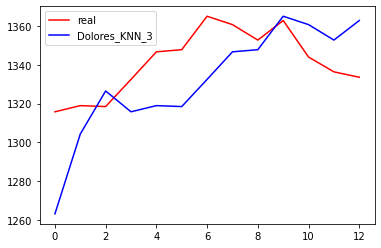

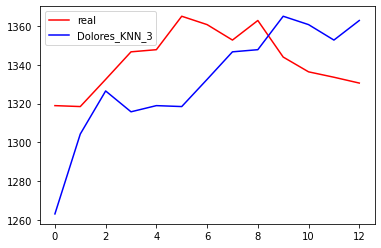

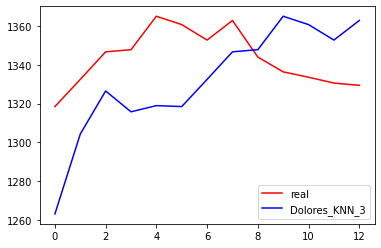

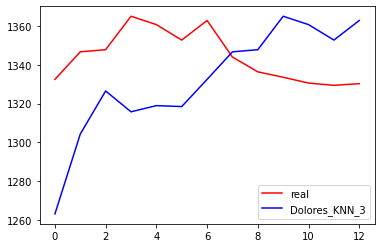

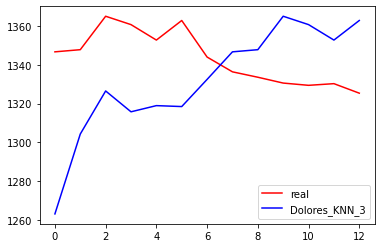

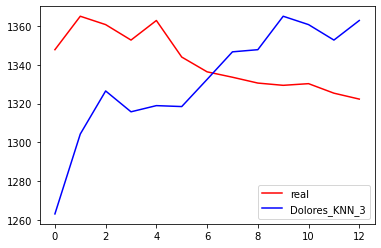

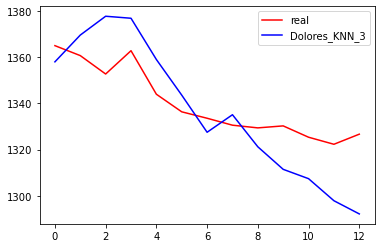

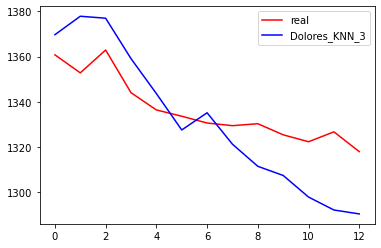

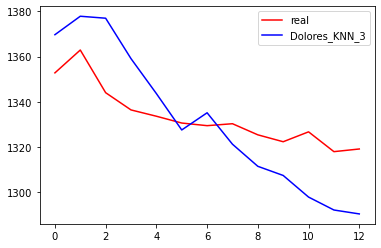

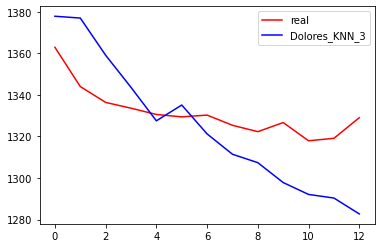

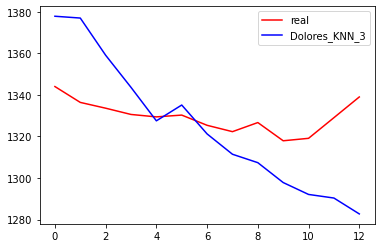

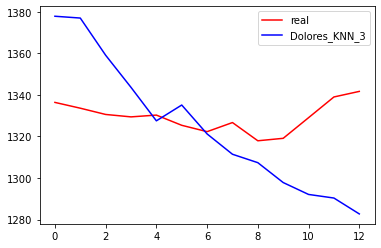

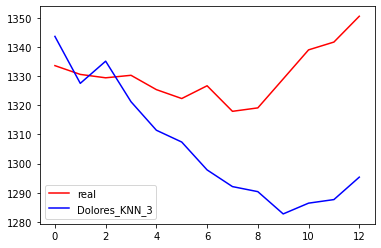

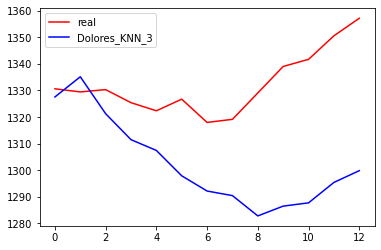

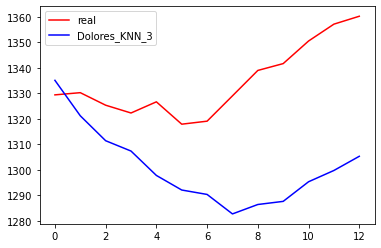

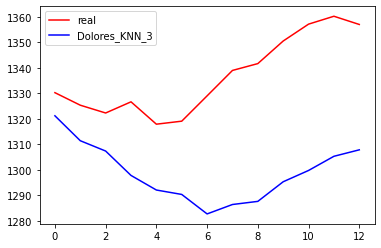

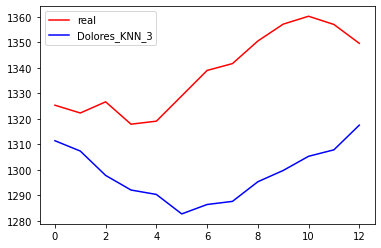

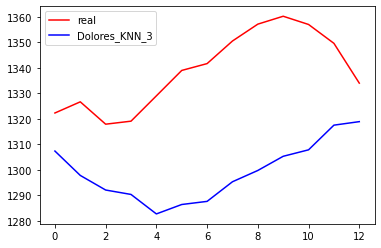

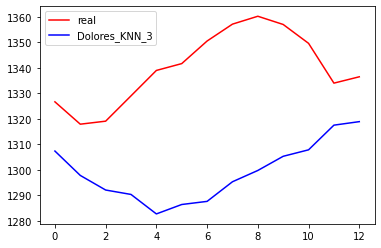

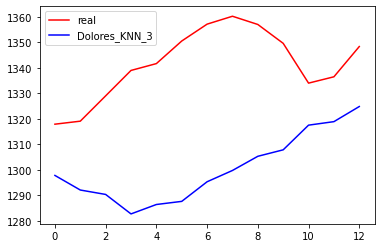

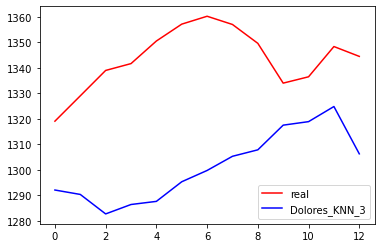

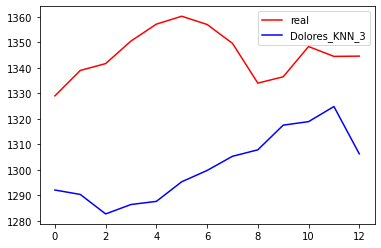

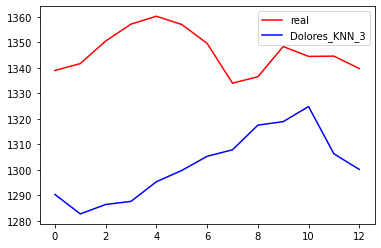

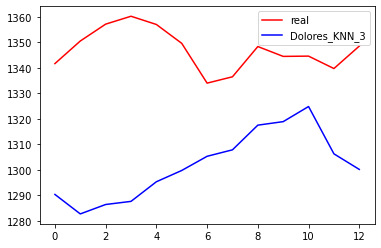

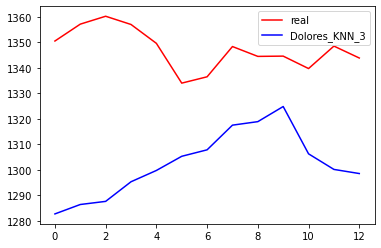

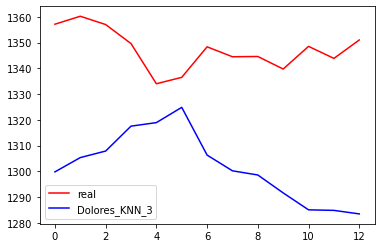

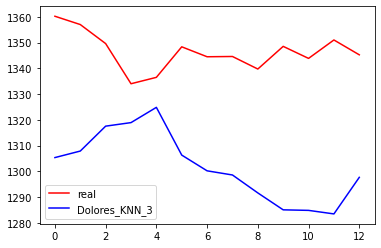

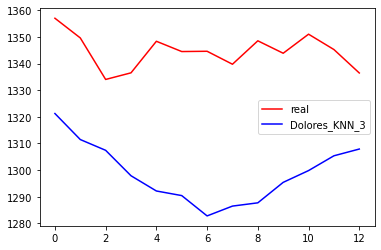

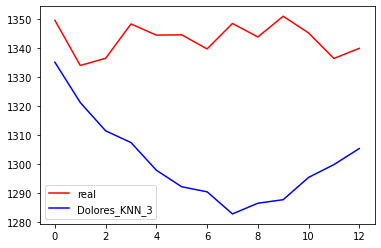

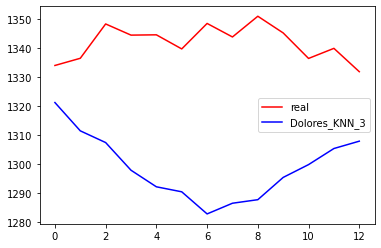

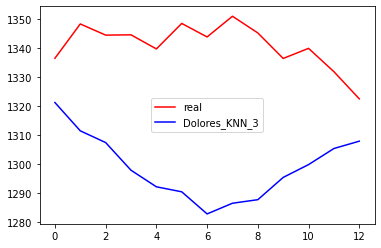

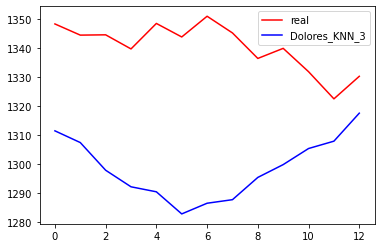

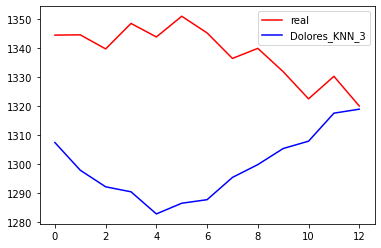

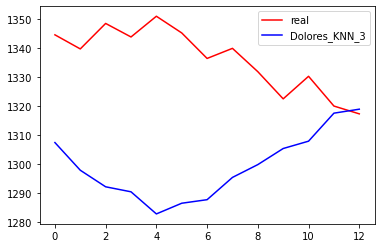

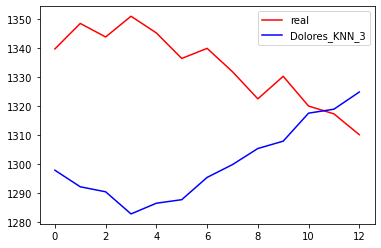

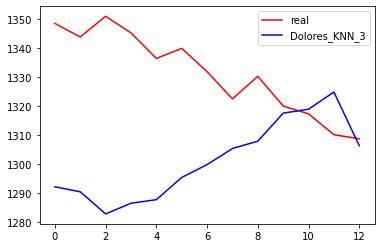

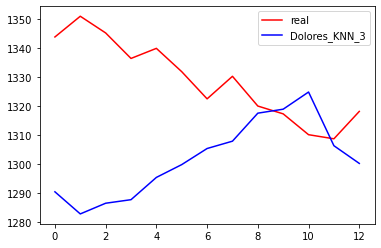

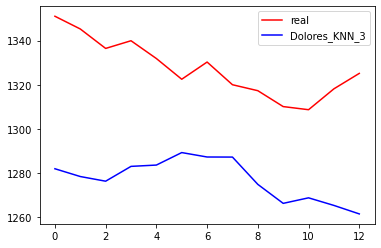

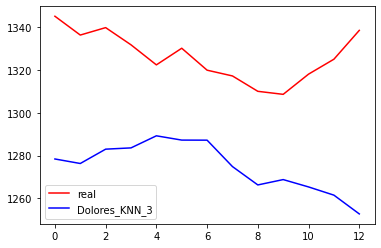

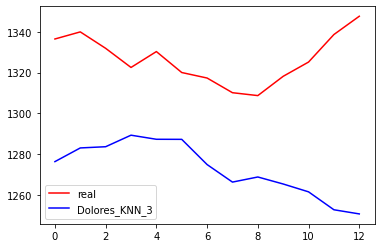

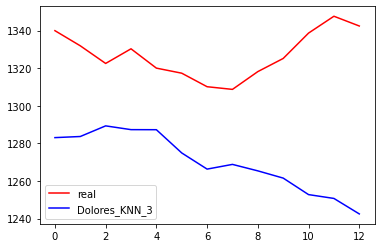

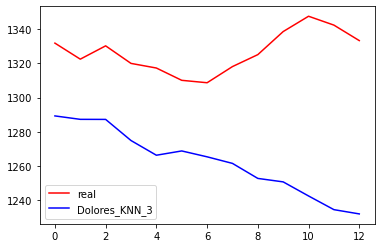

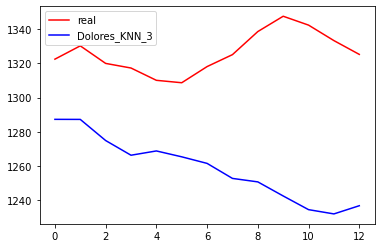

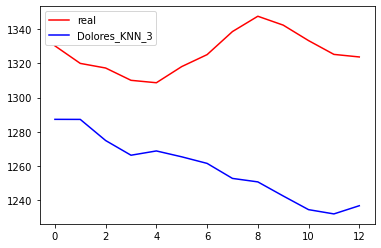

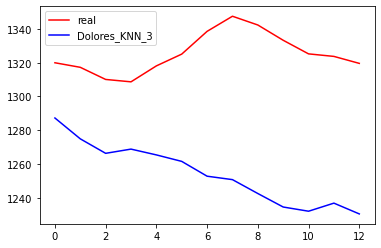

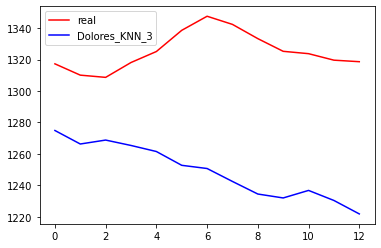

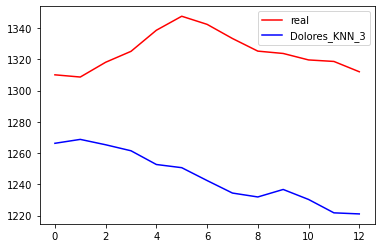

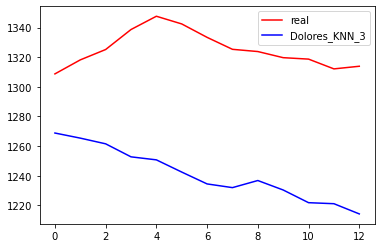

In [20]:
for i in range (50):   
    os_x = np.arange(size_ans_arr_3)
    num = i
    plt.plot(os_x, validation_ansvers_3[num],'r', label = 'real')
    plt.plot(os_x, prediction_Dolores_KNN_3[num],'b', label = 'Dolores_KNN_3')

    plt.legend()
    plt.show()

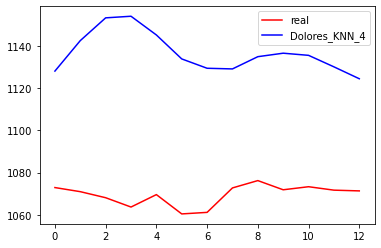

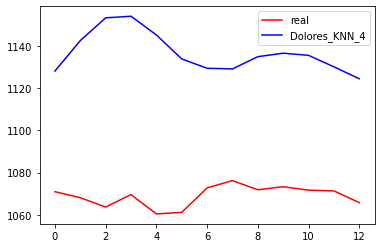

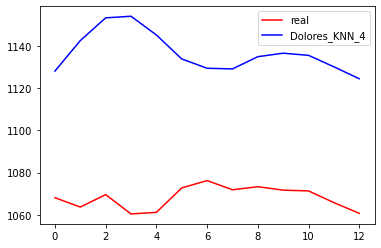

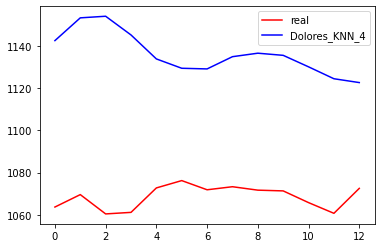

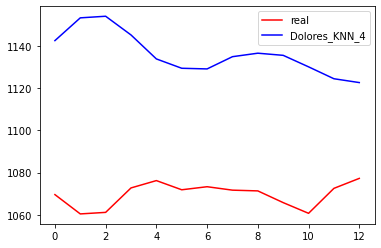

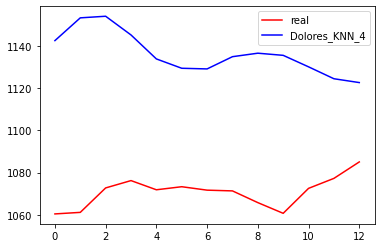

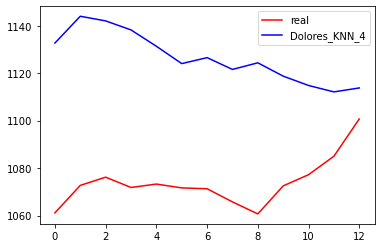

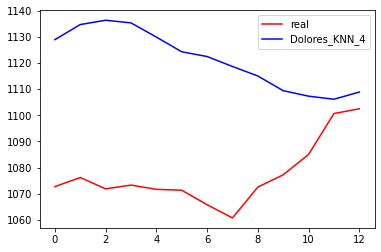

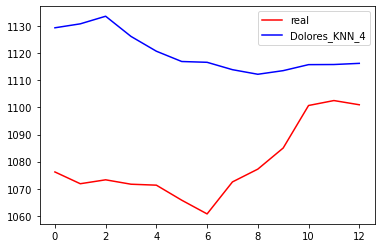

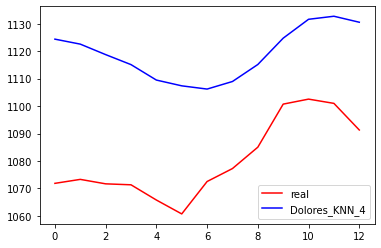

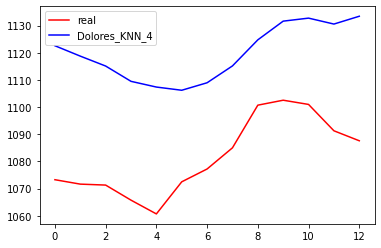

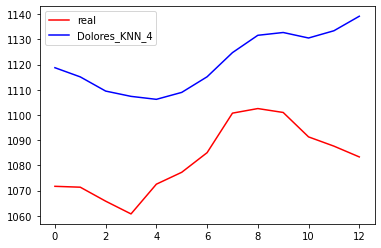

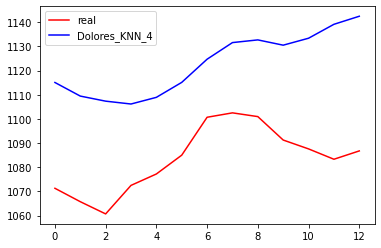

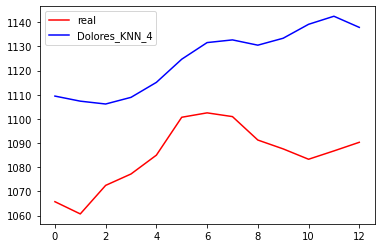

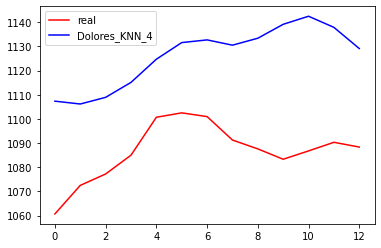

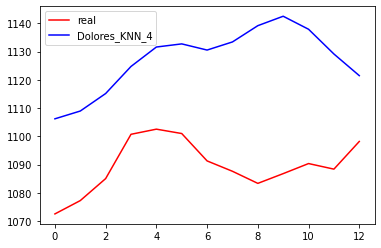

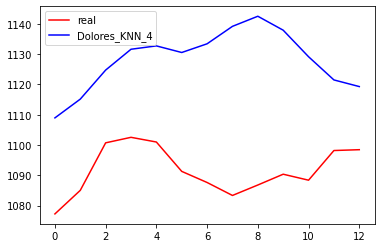

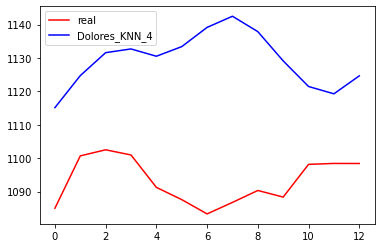

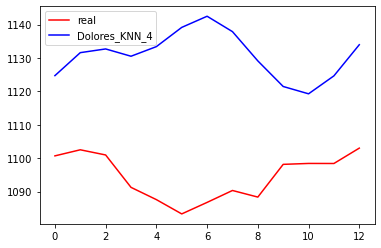

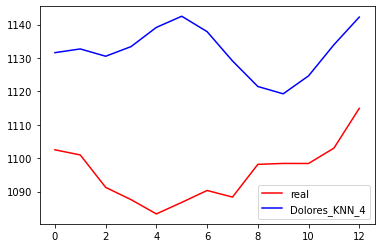

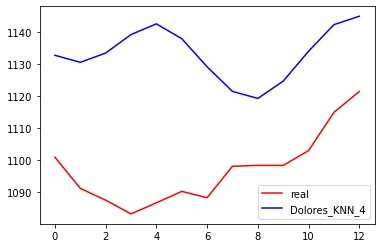

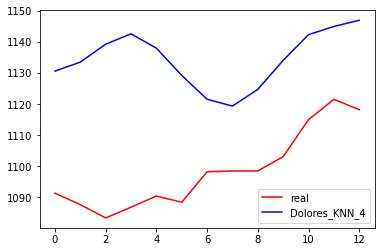

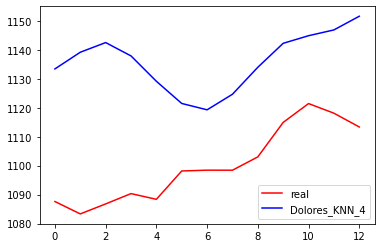

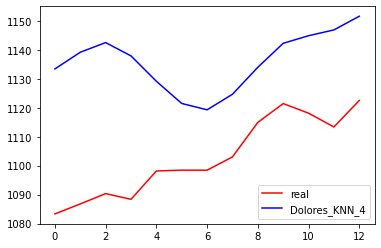

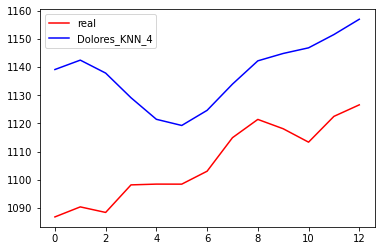

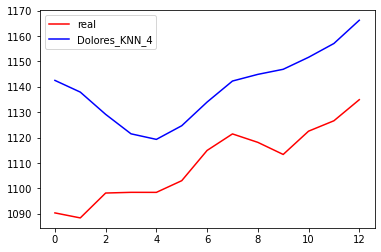

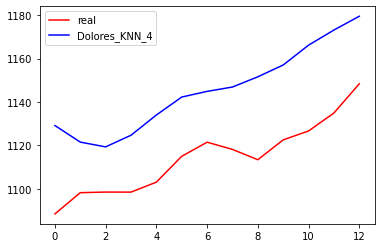

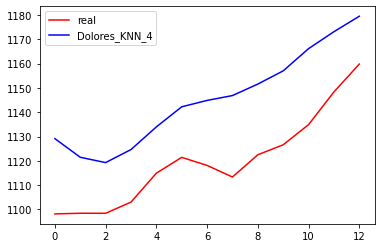

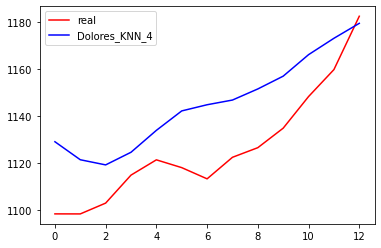

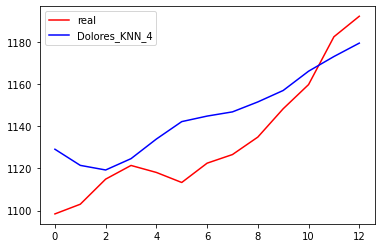

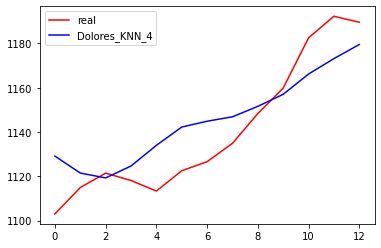

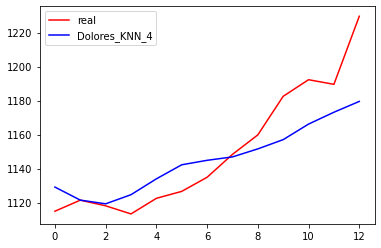

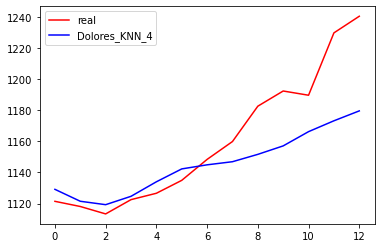

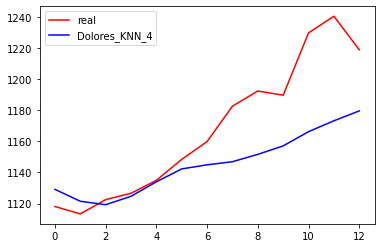

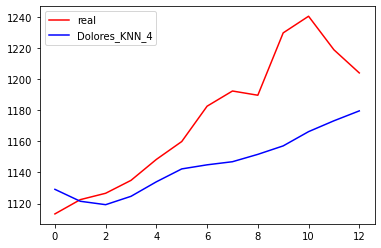

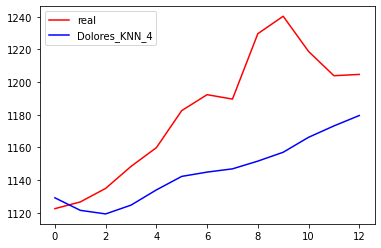

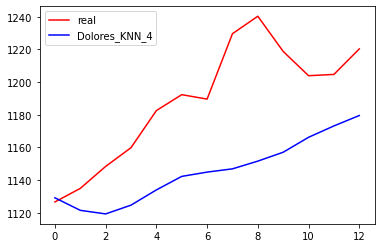

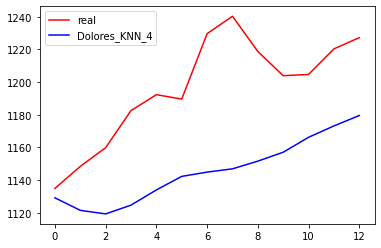

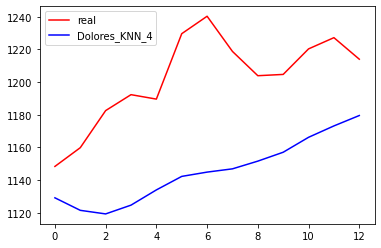

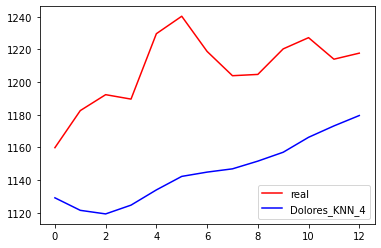

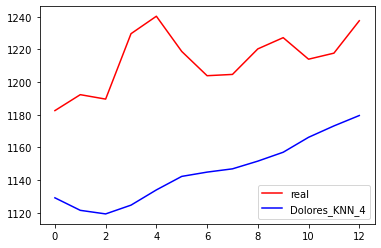

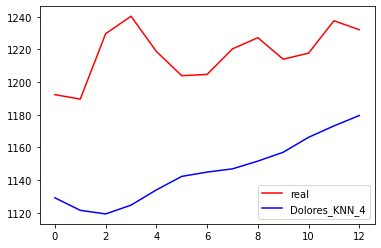

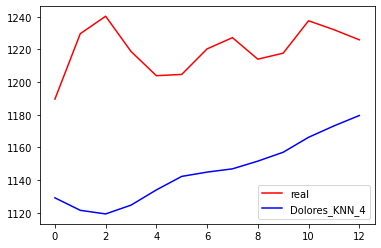

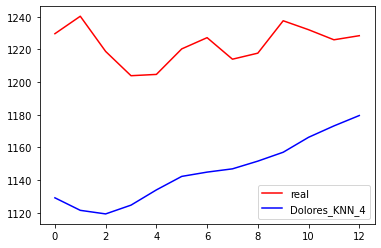

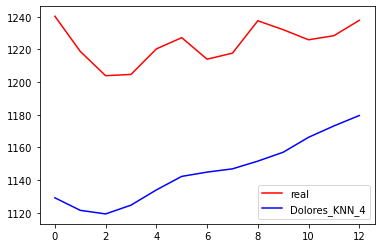

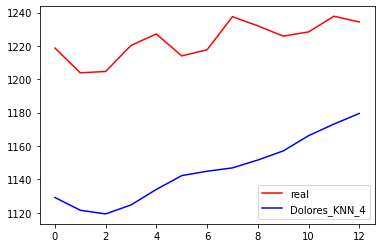

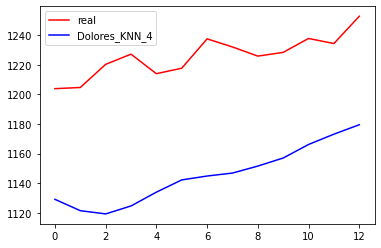

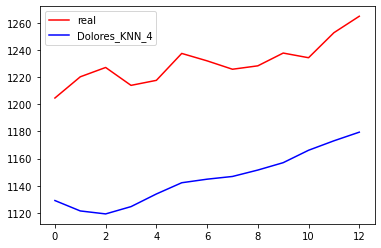

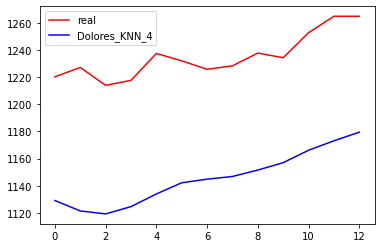

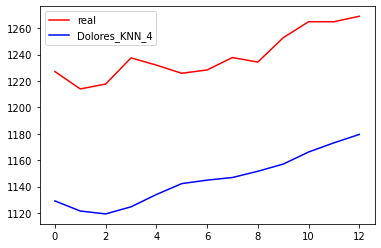

In [21]:
for i in range (50):   
    os_x = np.arange(size_ans_arr_3)
    num = i
    plt.plot(os_x, validation_ansvers_4[num],'r', label = 'real')
    plt.plot(os_x, prediction_Dolores_KNN_4[num],'b', label = 'Dolores_KNN_4')

    plt.legend()
    plt.show()

In [22]:
delt_KNN_1 = DeltaPercent (prediction_Dolores_KNN_1, validation_ansvers_1)
delt_KNN_2 = DeltaPercent (prediction_Dolores_KNN_2, validation_ansvers_2)
delt_KNN_3 = DeltaPercent (prediction_Dolores_KNN_3, validation_ansvers_3)

In [23]:
delt_KNN_1[0].std()

0.7006745224119609

In [24]:
delt_KNN_2[0].std()

0.6303596273299248

In [25]:
delt_KNN_3[3].std()

2.011846737771631

In [26]:
prediction_Dolores_KNN_3[99]

array([1314.1  , 1314.12 , 1319.775, 1316.645, 1312.905, 1317.39 ,
       1319.765, 1328.19 , 1326.585, 1318.605, 1320.79 , 1316.025,
       1319.04 ])

In [27]:
prediction_Dolores_KNN_3


array([[1263.07 , 1304.29 , 1326.51 , ..., 1360.745, 1352.77 , 1362.87 ],
       [1263.07 , 1304.29 , 1326.51 , ..., 1360.745, 1352.77 , 1362.87 ],
       [1263.07 , 1304.29 , 1326.51 , ..., 1360.745, 1352.77 , 1362.87 ],
       ...,
       [1187.065, 1172.43 , 1161.44 , ..., 1204.315, 1198.905, 1200.005],
       [1172.43 , 1161.44 , 1164.285, ..., 1198.905, 1200.005, 1206.315],
       [1172.43 , 1161.44 , 1164.285, ..., 1198.905, 1200.005, 1206.315]])

In [28]:
validation_predict_Dolores_KNN_1 = Dolores_KNN_1.predict(set_for_final_validation_1)
validation_predict_Dolores_KNN_2 = Dolores_KNN_2.predict(set_for_final_validation_2)
validation_predict_Dolores_KNN_3 = Dolores_KNN_3.predict(set_for_final_validation_3)

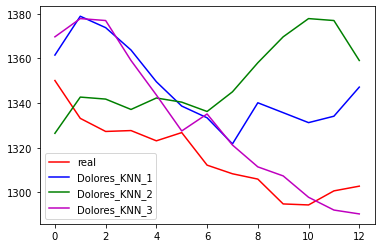

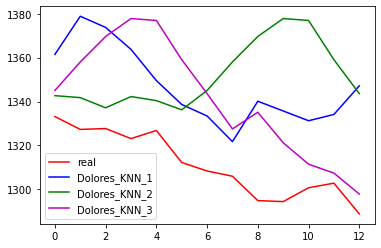

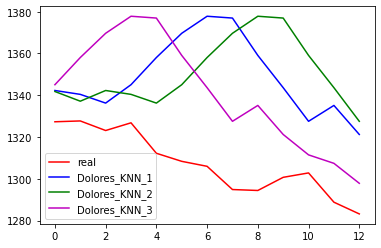

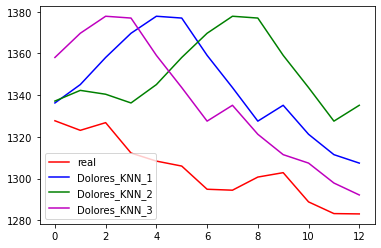

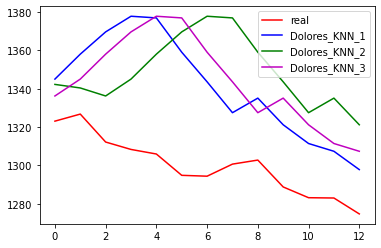

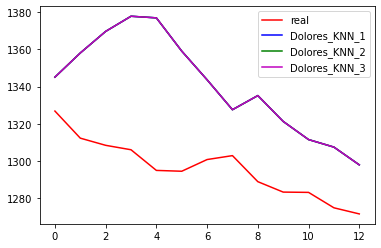

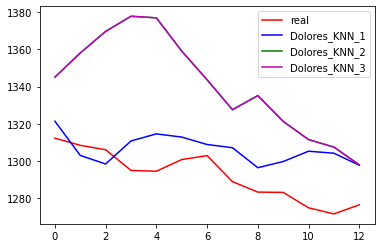

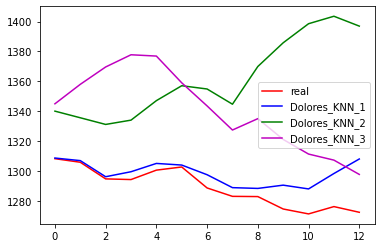

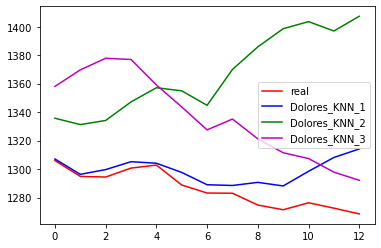

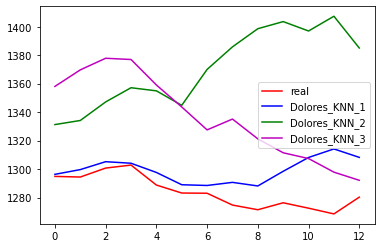

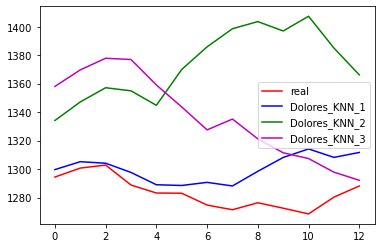

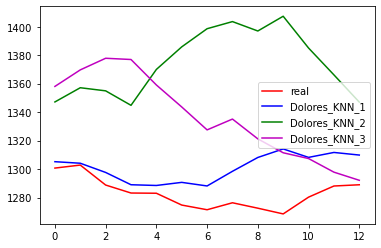

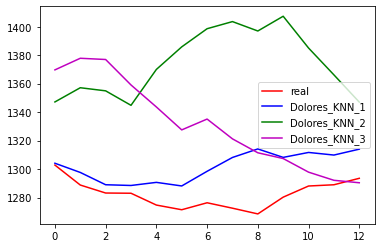

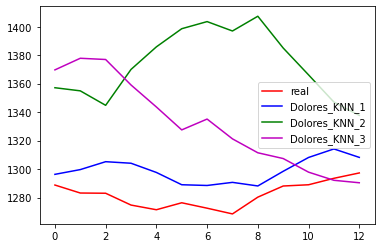

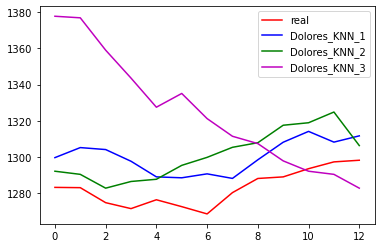

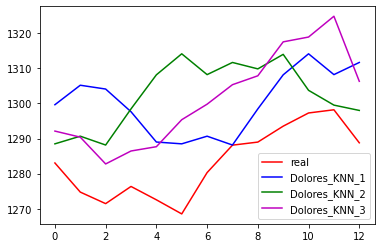

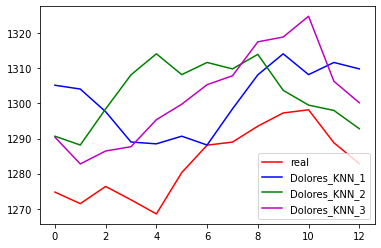

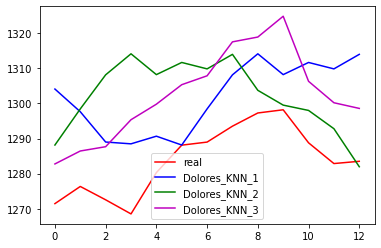

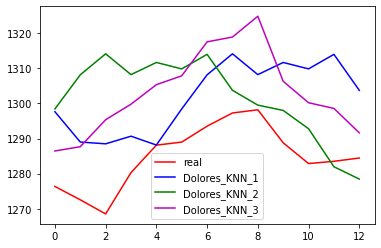

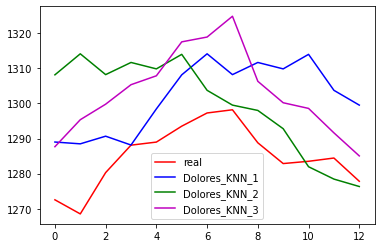

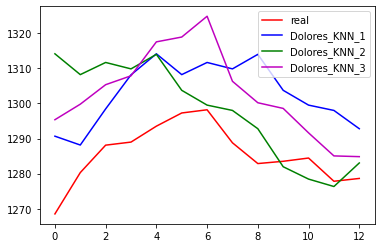

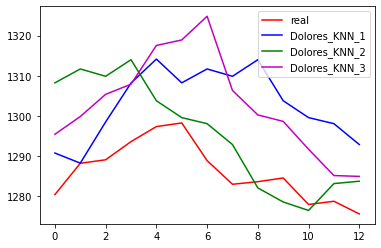

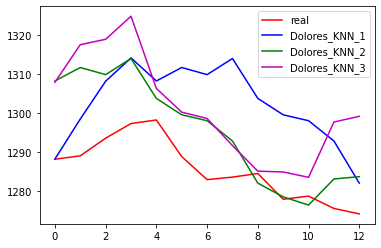

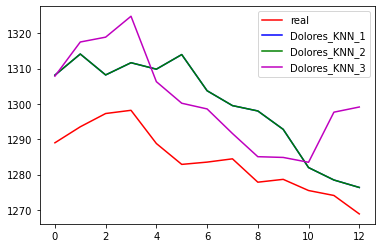

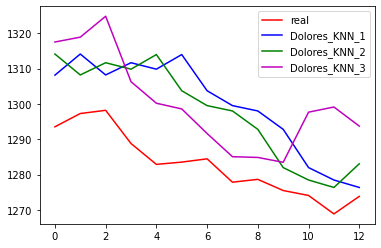

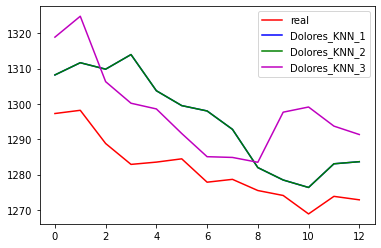

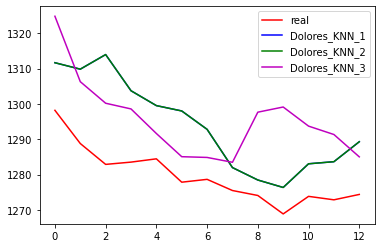

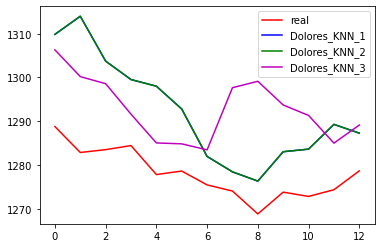

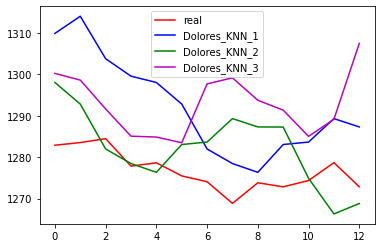

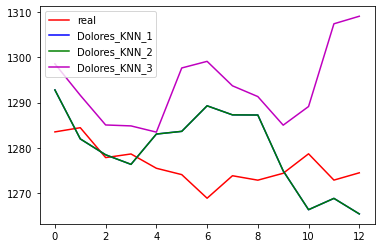

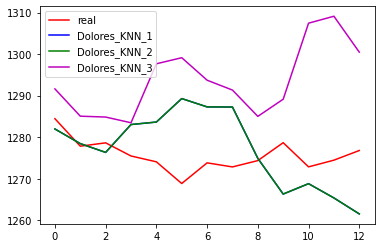

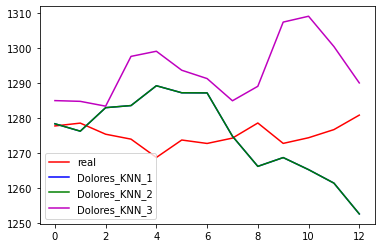

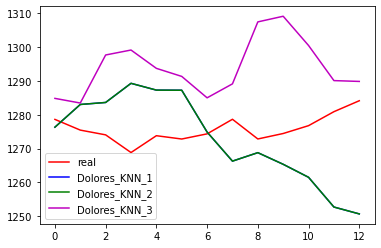

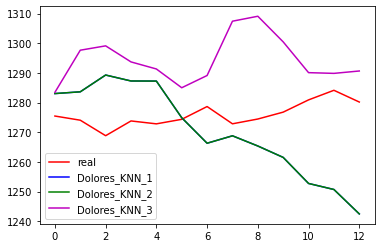

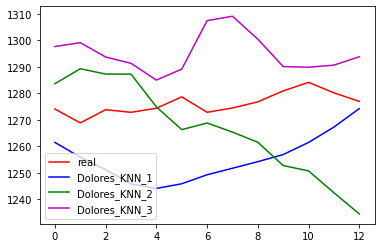

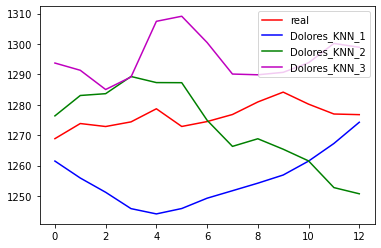

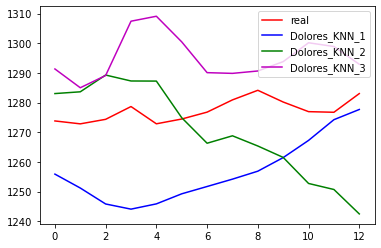

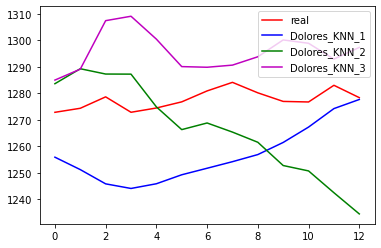

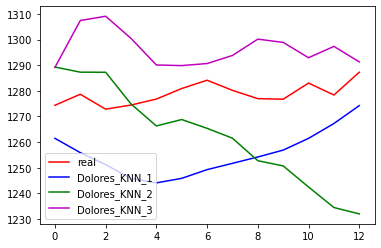

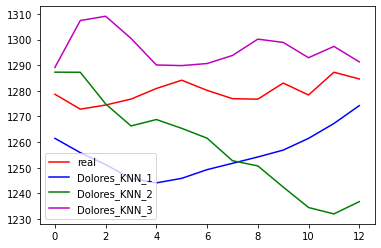

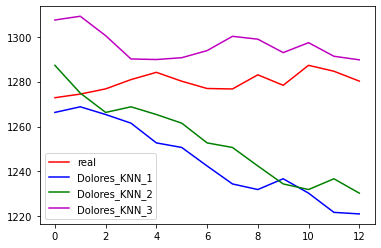

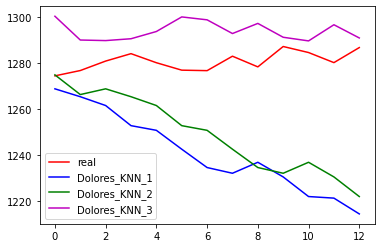

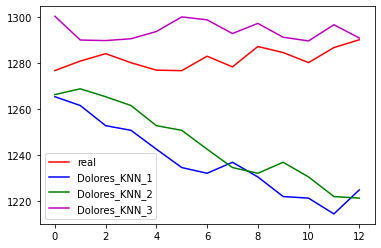

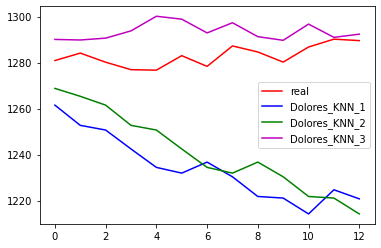

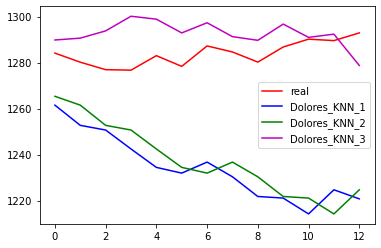

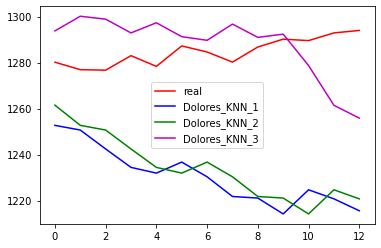

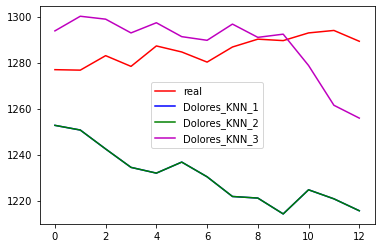

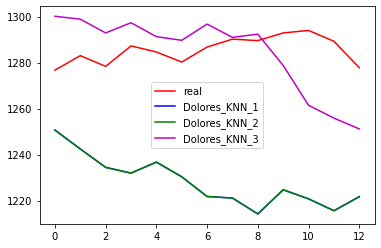

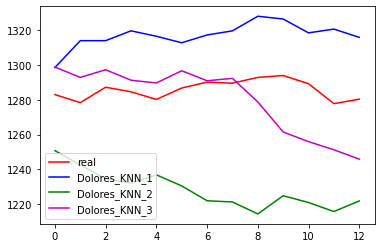

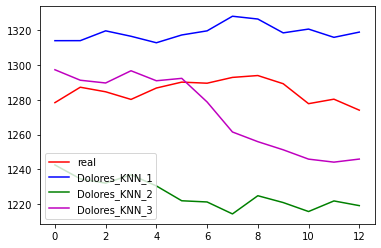

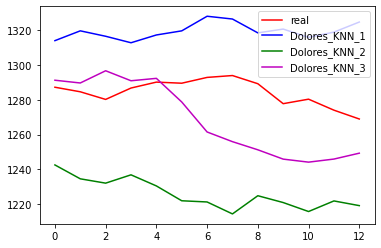

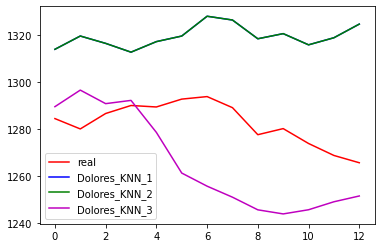

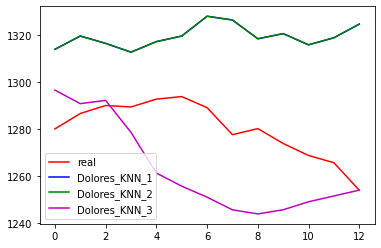

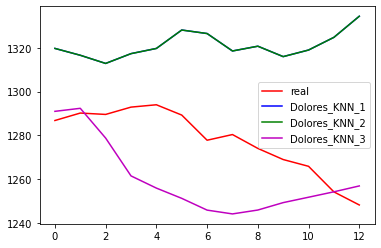

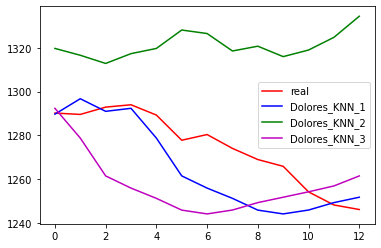

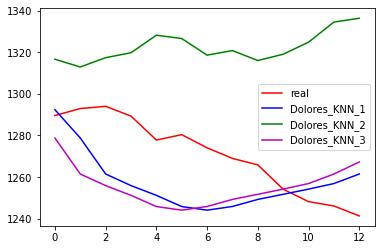

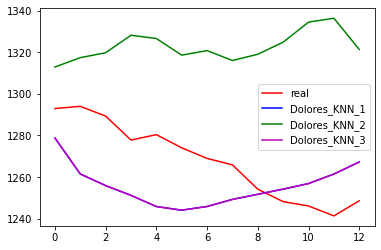

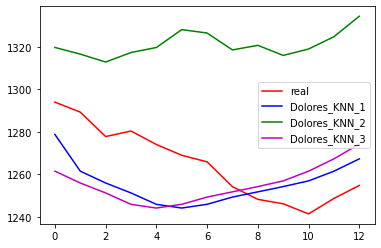

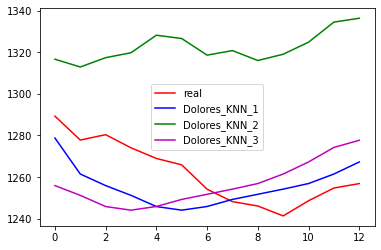

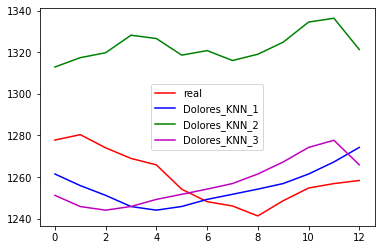

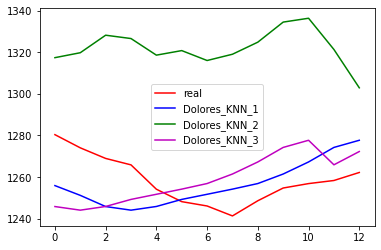

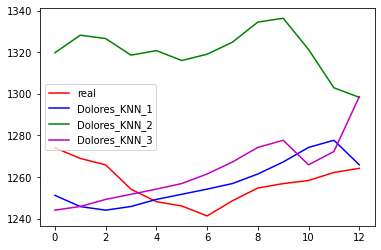

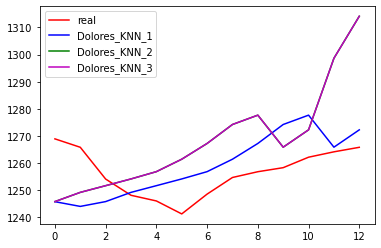

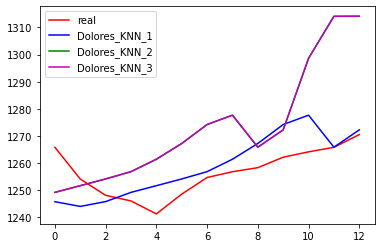

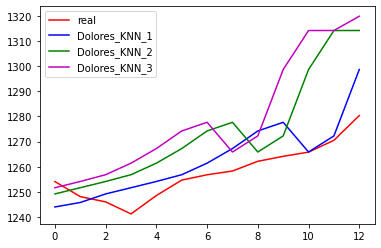

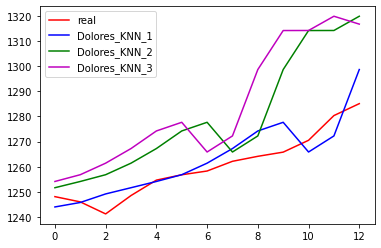

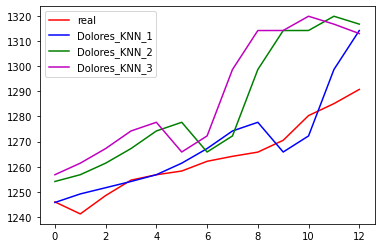

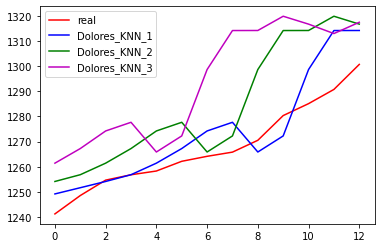

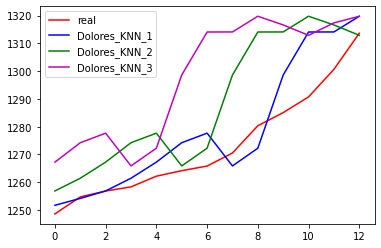

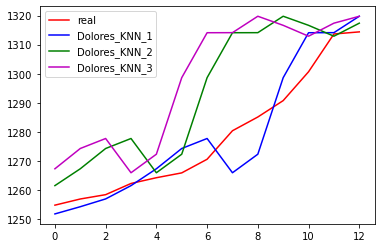

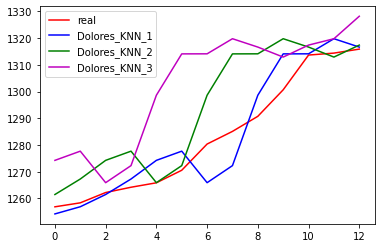

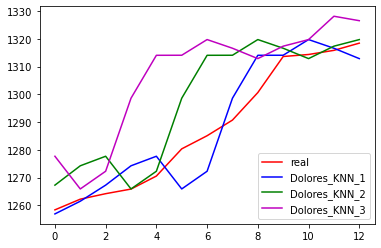

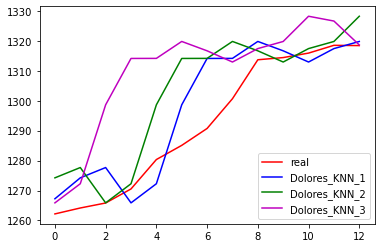

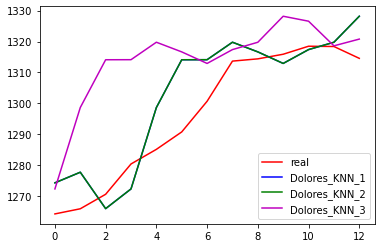

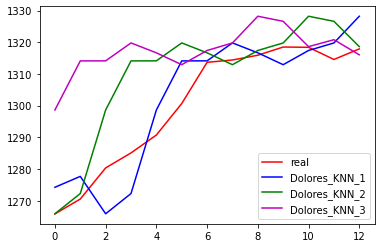

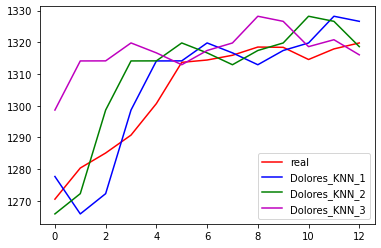

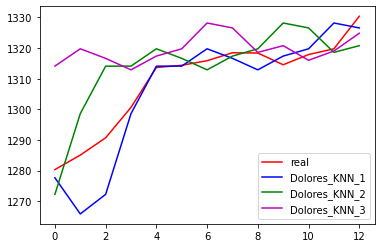

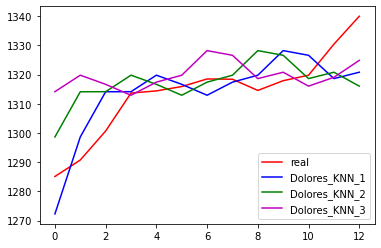

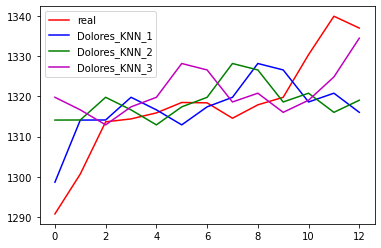

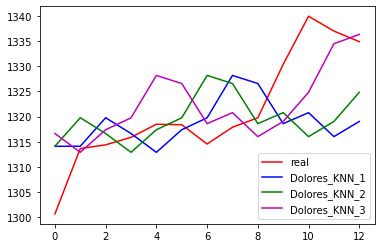

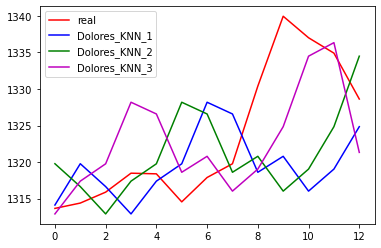

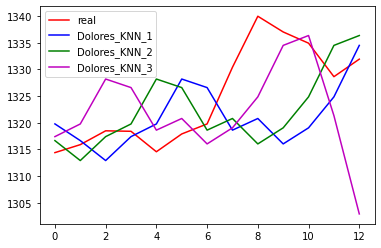

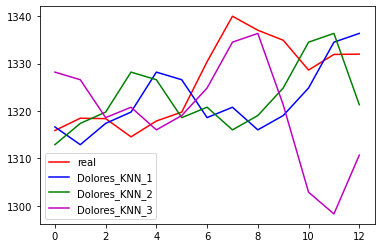

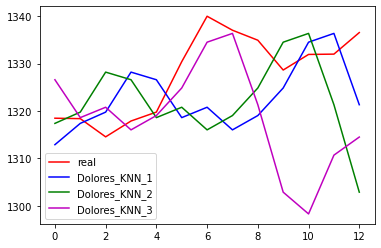

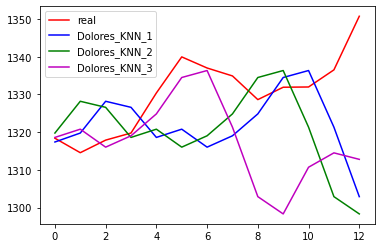

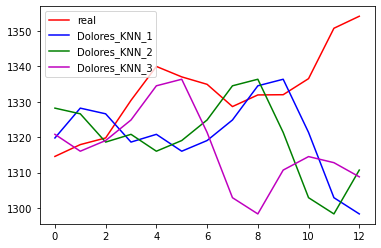

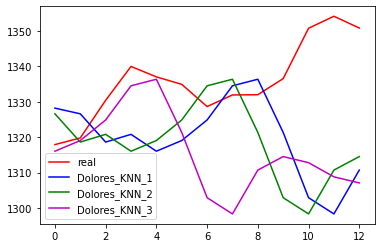

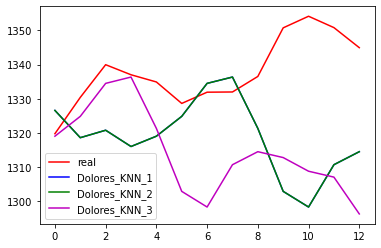

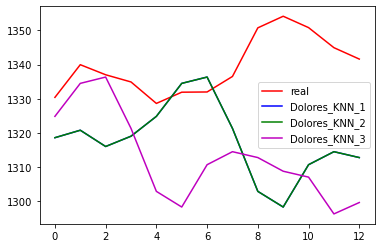

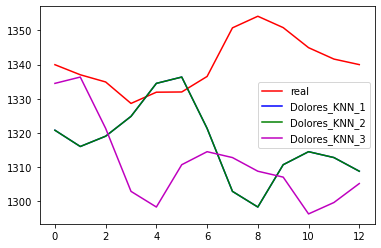

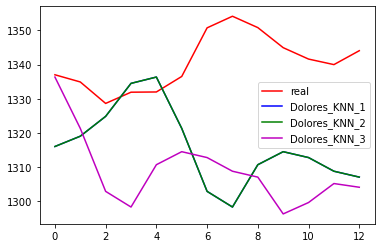

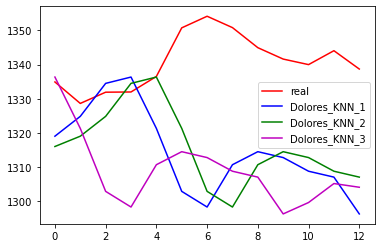

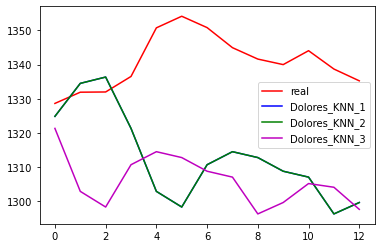

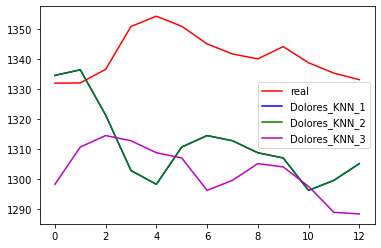

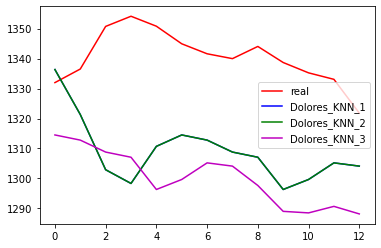

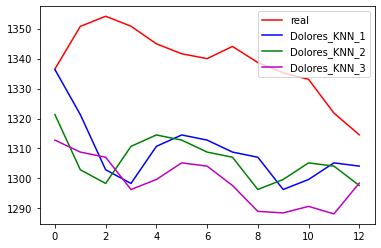

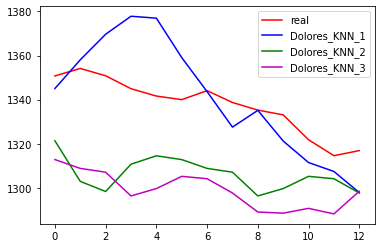

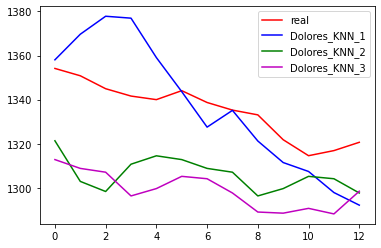

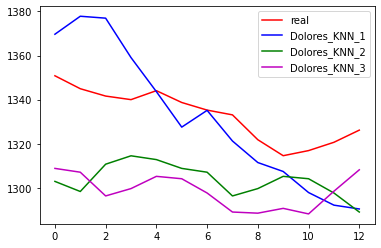

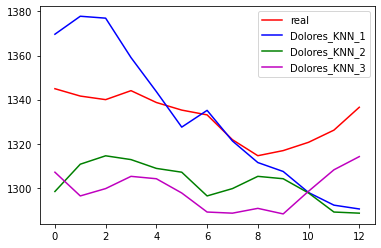

In [29]:
for i in range (100):   
    os_x = np.arange(size_ans_arr_3)
    num = i
    plt.plot(os_x, ansver_for_final_validation_1[num],'r', label = 'real')
    plt.plot(os_x, validation_predict_Dolores_KNN_1[num],'b', label = 'Dolores_KNN_1')
    plt.plot(os_x, validation_predict_Dolores_KNN_2[num],'g', label = 'Dolores_KNN_2')
    plt.plot(os_x, validation_predict_Dolores_KNN_3[num],'m', label = 'Dolores_KNN_3')

    plt.legend()
    plt.show()

In [30]:
delt_KNN_1 = DeltaPercent (validation_predict_Dolores_KNN_1, ansver_for_final_validation_1)
delt_KNN_2 = DeltaPercent (validation_predict_Dolores_KNN_2, ansver_for_final_validation_2)
delt_KNN_3 = DeltaPercent (validation_predict_Dolores_KNN_3, ansver_for_final_validation_3)

In [31]:
delt_KNN_1[0].std()

0.9427676338600064

In [32]:
delt_KNN_2[0].std()

2.3713307652299322

In [33]:
delt_KNN_3[0].std()

1.3555280444944118

In [34]:


###*
'b'	blue
'g'	green
'r'	red
'c'	cyan
'm'	magenta
'y'	yellow
'k'	black
'w'	white
###

SyntaxError: invalid syntax (<ipython-input-34-0130fcde0a7a>, line 2)